In [ ]:
import pandas as pd
import os

def print_statistics(data):
    total_interactions = data.shape[0]
    unique_users = data['user'].nunique()
    unique_artists = data['artist'].nunique()
    unique_tracks = data['track_name'].nunique()

    print("\nFinal Dataset Overview:")
    print(f"Total Interactions: {total_interactions}")
    print(f"Unique Users: {unique_users}")
    print(f"Unique Artists: {unique_artists}")
    print(f"Unique Tracks: {unique_tracks}")
    print(f"Average Interactions per User: {total_interactions / unique_users:.2f}")
    print(f"Average Interactions per Track: {total_interactions / unique_tracks:.2f}")
    print(f"Interaction Matrix Density: {total_interactions / (unique_users * unique_tracks):.10f}")


In [ ]:
import requests
import pandas as pd
from IPython.display import display

def download_csv_from_github(file_url, local_path):
    """
    Download a file from GitHub using its raw URL and save it locally.

    Parameters:
    file_url (str): The raw URL to the file on GitHub.
    local_path (str): The local path where the file should be saved.
    """
    try:
        response = requests.get(file_url)
        response.raise_for_status()  # Will raise an HTTPError for bad requests (400 or 500)
        with open(local_path, 'wb') as f:
            f.write(response.content)
        print(f"Successfully downloaded {local_path}")
        return pd.read_csv(local_path)  # Return the dataframe
    except requests.exceptions.HTTPError as err:
        print(f"HTTP error occurred: {err}")  # Specific HTTP error
    except Exception as err:
        print(f"An error occurred: {err}")  # General errors in the download process



In [ ]:
flag_ds = 'ml100k' #'lastFM1k' #'ml100k'
num_tracks = 10
context_length = 5
top_k = 3
file = f"final_df_foundItemIds_{flag_ds}_fullInteraction_80users_nTrack{num_tracks}_lContext{context_length}_top{top_k}.csv"
# Base URL for raw files on GitHub
base_url = "https://raw.githubusercontent.com/yasdel/Benchmark_RecLLM_Fairness/main/results/"
final_df = download_csv_from_github(base_url + file, file)
display(final_df.head(10))

Successfully downloaded final_df_foundItemIds_ml100k_fullInteraction_80users_nTrack10_lContext5_top3.csv


,userId,gender,age_group,movieIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-1,recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-2,recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-zero-shot,recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-ICL-Few-shot-1,recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-ICL-Few-shot-2,recommendation_for_prompt_counterfact-False_sample-random_userDemo-age-group_interact-zero-shot,...,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-no_info_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-gender_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-gender_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-gender_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-age-group_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-age-group_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-age-group_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-intersectional_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-intersectional_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-intersectional_interact-ICL-Few-shot-2_itemIds
0,19,Male,Early Adult (≤32 yrs),"[2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...","- ""Inception"" - Action|Adventure|Sci-Fi\n- ""Se...","- ""The Matrix (1999)"" - Action|Sci-Fi\n- ""The ...",- The Matrix (1999) - Action|Sci-Fi|Thriller\n...,- The Matrix (1999) - Action|Sci-Fi\n- The Bla...,"""Mad Max: Fury Road"" - Action|Sci-Fi\n""The Con...","""The Matrix"" - Action|Sci-Fi|Thriller\n""Fight ...",...,"[4, 3, 4]","[183, 5, 65]","[4, 3, 3]","[4, 3, 4]","[183, 5, 12]","[4, 3, 3]","[4, 3, 4]","[12, 3505]","[4, 3, 4]","[4, 3, 4]"
1,1420,Male,Early Adult (≤32 yrs),"[2527, 593, 527, 1210, 1196, 260, 1214, 1240, ...","""Prisoners"" - Crime|Drama|Mystery|Thriller \n...","- ""The Departed (2006)"" - Crime|Drama|Thriller...",- Heat (1995) - Action|Crime|Drama|Thriller\n-...,"- ""The Departed (2006)"" - Crime|Drama|Thriller...","""Training Day"" - Crime|Drama|Thriller\n""The De...",- Heat (1995) - Action|Crime|Drama|Thriller\n-...,...,[22],"[593, 6, 163]","[22, 16]","[22, 6]","[6, 6, 6]","[6, 6, 6]","[6, 6, 6]","[47, 47, 18]","[22, 6]","[22, 16]"
2,1733,Male,Early Adult (≤32 yrs),"[2527, 593, 2115, 1210, 1198, 260, 1240, 457, ...","""Lost Highway (1997)"" - Drama|Mystery|Thriller...","""Prisoners (2013)"" - Drama|Mystery|Thriller\n""...","""Apocalypse Now (1979)"" - War/Drama\n""Blade Ru...","""Mulholland Drive (2001)"" - Drama|Mystery|Thri...","""Lost Highway (1997)"" - Drama|Mystery|Thriller...",- Eternal Sunshine of the Spotless Mind - Dram...,...,"[4, 3, 11]","[1306, 58]","[4, 4, 3]","[4, 3, 11]",[14],"[4, 4, 3]","[4, 3, 11]",[14],"[4, 4, 3]","[4, 3, 11]"
3,3618,Male,Mid Adult (>32 yrs),"[2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...","""The Fisher King (1991)"" - Comedy|Drama|Fantas...","- ""The Green Mile (1999)"" - Drama\n- ""A Beauti...","""The Shawshank Redemption"" - Drama\n""L.A. Conf...","""The Pursuit of Happyness (2006)"" - Drama\n""Th...",- The Shawshank Redemption - Drama\n- Good Wil...,"- ""The Shawshank Redemption"" - Drama\n- ""Forre...",...,"[14, 4, 16]","[14, 4, 14]","[3, 3, 11]","[14, 4, 16]","[4, 14, 3]","[4, 14, 3]","[4, 14, 3]","[14, 4, 14]","[14, 4, 16]","[3, 14, 4]"
4,3841,Male,Mid Adult (>32 yrs),"[2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...","""War of t

In [ ]:
import pandas as pd

# Assuming df is your dataframe
# Create a list of columns to select
selected_columns = list(final_df.columns[:4])  # Select first 5 columns
print(selected_columns)
# Select columns ending with '_itemIds'
selected_columns += [col for col in final_df.columns if col.endswith('_itemIds')]
print(selected_columns)
new_df = final_df[selected_columns].copy()

new_df = new_df.rename(columns={'movieIds': 'itemIds'})
new_df

['userId', 'gender', 'age_group', 'movieIds']
['userId', 'gender', 'age_group', 'movieIds', 'recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-1_itemIds', 'recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-2_itemIds', 'recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-zero-shot_itemIds', 'recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-ICL-Few-shot-1_itemIds', 'recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-ICL-Few-shot-2_itemIds', 'recommendation_for_prompt_counterfact-False_sample-random_userDemo-age-group_interact-zero-shot_itemIds', 'recommendation_for_prompt_counterfact-False_sample-random_userDemo-age-group_interact-ICL-Few-shot-1_itemIds', 'recommendation_for_prompt_counterfact-False_sample-random_userDemo-age-group_interact-ICL-Few-shot-2_itemIds', 'recommendation_for_prompt_counterf

,userId,gender,age_group,itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-age-group_interact-zero-shot_itemIds,...,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-no_info_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-gender_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-gender_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-gender_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-age-group_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-age-group_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-age-group_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-intersectional_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-intersectional_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-intersectional_interact-ICL-Few-shot-2_itemIds
0,19,Male,Early Adult (≤32 yrs),"[2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...","[112, 517]","[6, 6, 1]","[6, 4, 164]","[6, 6, 8]","[198, 98, 1]","[6, 14, 1]",...,"[4, 3, 4]","[183, 5, 65]","[4, 3, 3]","[4, 3, 4]","[183, 5, 12]","[4, 3, 3]","[4, 3, 4]","[12, 3505]","[4, 3, 4]","[4, 3, 4]"
1,1420,Male,Early Adult (≤32 yrs),"[2527, 593, 527, 1210, 1196, 260, 1214, 1240, ...","[161, 230]","[6, 6]","[6, 6, 6]","[6, 6]","[16, 22]","[6, 4, 6]",...,[22],"[593, 6, 163]","[22, 16]","[22, 6]","[6, 6, 6]","[6, 6, 6]","[6, 6, 6]","[47, 47, 18]","[22, 6]","[22, 16]"
2,1733,Male,Early Adult (≤32 yrs),"[2527, 593, 2115, 1210, 1198, 260, 1240, 457, ...","[16, 16, 16]","[16, 16, 16]","[14, 10, 11]","[16, 16]","[16, 6, 16]","[11, 66, 44]",...,"[4, 3, 11]","[1306, 58]","[4, 4, 3]","[4, 3, 11]",[14],"[4, 4, 3]","[4, 3, 11]",[14],"[4, 4, 3]","[4, 3, 11]"
3,3618,Male,Mid Adult (>32 yrs),"[2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...","[3, 4, 3]","[14, 14, 14]","[14, 22, 3]","[14, 6]","[14, 14, 2086]","[14, 11, 290]",...,"[14, 4, 16]","[14, 4, 14]","[3, 3, 11]","[14, 4, 16]","[4, 14, 3]","[4, 14, 3]","[4, 14, 3]","[14, 4, 14]","[14, 4, 16]","[3, 14, 4]"
4,3841,Male,Mid Adult (>32 yrs),"[2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...","[21, 66]","[66, 16, 24]","[185, 6, 6]","[66, 16, 10]","[66, 16, 24]","[185, 6, 6]",...,"[6, 6, 6]","[6, 6, 66]","[6, 6, 6]","[6, 66, 16]","[6, 76, 66]","[6, 6, 160]","[6, 66, 16]","[10, 6, 58]","[6, 24, 750]","[6, 66, 16]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1177,Female,Early Adult (≤32 yrs),"[2028, 2948, 1580, 380, 3114, 1259, 2321, 2455...","[4, 6]","[6, 14, 3]","[17, 79]","[4, 6]","[6, 6]","[22, 35, 32]",...,"[3, 3, 3]","[6, 10, 6]","[3, 3, 3]","[3, 3, 3]","[296, 79]","[3, 3, 3]","[4, 22]","[22, 112, 14]","[3, 3, 3]","[6, 14]"
76,2394,Male,Mid Adult (>32 yrs),"[1197, 10, 2628, 1220, 1580, 733, 1372, 380, 1...","[6, 29, 33]","[6, 6, 6]","[10, 11, 6]","[6, 6, 6]","[6, 6, 6]","[15, 1750, 112]",...,"[6, 10, 6]","[10, 10, 6]","[6, 10, 6]","[10, 10, 10]","[10, 10, 2]","[6, 6, 10]","[6, 6, 6]","[9, 8, 1]","[10, 10, 10]","[6, 6, 9]"
77,5751,Female,Early Adult (≤32 yrs)

In [ ]:
import pandas as pd
import ast

new_df2 = new_df.copy()

# Function to safely convert list-like strings to lists of integers
def safe_convert_to_list(x):
    try:
        return ast.literal_eval(x)
    except (SyntaxError, ValueError):
        return None

# Print out the unique values in the columns before conversion
for col in new_df2.columns:
    if col.endswith('_itemIds'):
        print(f"Unique values in column '{col}':")
        print(new_df2[col].unique())
        new_df2[col] = new_df[col].apply(safe_convert_to_list)


int_columns = [col for col in new_df2.columns if col.endswith('_itemIds')]
print(int_columns)

for col in int_columns:
    new_df2[col] = new_df2[col].apply(lambda x: [int(i) for sublist in x for i in sublist] if isinstance(x, list) and all(isinstance(i, list) for i in x) else x)

# Output DataFrame
display(new_df2)




Unique values in column 'recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-1_itemIds':
['[112, 517]' '[161, 230]' '[16, 16, 16]' '[3, 4, 3]' '[21, 66]'
 '[6, 6, 6]' '[14, 22]' '[6, 10, 6]' '[44, 51, 66]' '[16, 14, 41]'
 '[84, 17, 45]' '[6, 164, 3]' '[6, 22, 47]' '[6, 21]' '[12, 16, 6]'
 '[10, 6, 17]' '[6, 16]' '[6, 21, 4]' '[3, 17]' '[3, 3, 3]' '[6, 3, 4]'
 '[16, 33, 8]' '[113, 290]' '[4, 17, 16]' '[66, 29]' '[4, 6]'
 '[11, 58, 4]' '[26, 14]' '[14, 245]' '[6, 22]' '[4, 16, 16]' '[10, 89]'
 '[24, 6]' '[6, 4, 3]' '[2, 3, 3]' '[10, 14, 4]' '[16, 6]' '[42, 41, 41]'
 '[14, 4, 14]' '[6, 4, 6]' '[3]' '[11, 3, 3]' '[3, 6, 29]' '[6, 3, 14]'
 '[11, 17, 17]' '[10, 7, 3]' '[14, 14, 1589]' '[1, 11, 2]' '[10, 6]'
 '[14, 14, 41]' '[4, 4, 6]' '[10, 262, 2]' '[3, 3, 14]' '[6, 4, 33]'
 '[6, 4]' '[3, 3]' '[22, 16]' '[6, 8, 6]' '[10, 33, 29]' '[3, 5]'
 '[14, 24, 24]' '[1, 4, 4]' '[258, 54, 172]' '[9, 6]' '[14, 6, 5]'
 '[6, 3, 2]' '[152, 24, 5]' '[6, 6, 11]' '

,userId,gender,age_group,itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-age-group_interact-zero-shot_itemIds,...,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-no_info_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-gender_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-gender_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-gender_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-age-group_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-age-group_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-age-group_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-intersectional_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-intersectional_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-intersectional_interact-ICL-Few-shot-2_itemIds
0,19,Male,Early Adult (≤32 yrs),"[2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...","[112, 517]","[6, 6, 1]","[6, 4, 164]","[6, 6, 8]","[198, 98, 1]","[6, 14, 1]",...,"[4, 3, 4]","[183, 5, 65]","[4, 3, 3]","[4, 3, 4]","[183, 5, 12]","[4, 3, 3]","[4, 3, 4]","[12, 3505]","[4, 3, 4]","[4, 3, 4]"
1,1420,Male,Early Adult (≤32 yrs),"[2527, 593, 527, 1210, 1196, 260, 1214, 1240, ...","[161, 230]","[6, 6]","[6, 6, 6]","[6, 6]","[16, 22]","[6, 4, 6]",...,[22],"[593, 6, 163]","[22, 16]","[22, 6]","[6, 6, 6]","[6, 6, 6]","[6, 6, 6]","[47, 47, 18]","[22, 6]","[22, 16]"
2,1733,Male,Early Adult (≤32 yrs),"[2527, 593, 2115, 1210, 1198, 260, 1240, 457, ...","[16, 16, 16]","[16, 16, 16]","[14, 10, 11]","[16, 16]","[16, 6, 16]","[11, 66, 44]",...,"[4, 3, 11]","[1306, 58]","[4, 4, 3]","[4, 3, 11]",[14],"[4, 4, 3]","[4, 3, 11]",[14],"[4, 4, 3]","[4, 3, 11]"
3,3618,Male,Mid Adult (>32 yrs),"[2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...","[3, 4, 3]","[14, 14, 14]","[14, 22, 3]","[14, 6]","[14, 14, 2086]","[14, 11, 290]",...,"[14, 4, 16]","[14, 4, 14]","[3, 3, 11]","[14, 4, 16]","[4, 14, 3]","[4, 14, 3]","[4, 14, 3]","[14, 4, 14]","[14, 4, 16]","[3, 14, 4]"
4,3841,Male,Mid Adult (>32 yrs),"[2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...","[21, 66]","[66, 16, 24]","[185, 6, 6]","[66, 16, 10]","[66, 16, 24]","[185, 6, 6]",...,"[6, 6, 6]","[6, 6, 66]","[6, 6, 6]","[6, 66, 16]","[6, 76, 66]","[6, 6, 160]","[6, 66, 16]","[10, 6, 58]","[6, 24, 750]","[6, 66, 16]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1177,Female,Early Adult (≤32 yrs),"[2028, 2948, 1580, 380, 3114, 1259, 2321, 2455...","[4, 6]","[6, 14, 3]","[17, 79]","[4, 6]","[6, 6]","[22, 35, 32]",...,"[3, 3, 3]","[6, 10, 6]","[3, 3, 3]","[3, 3, 3]","[296, 79]","[3, 3, 3]","[4, 22]","[22, 112, 14]","[3, 3, 3]","[6, 14]"
76,2394,Male,Mid Adult (>32 yrs),"[1197, 10, 2628, 1220, 1580, 733, 1372, 380, 1...","[6, 29, 33]","[6, 6, 6]","[10, 11, 6]","[6, 6, 6]","[6, 6, 6]","[15, 1750, 112]",...,"[6, 10, 6]","[10, 10, 6]","[6, 10, 6]","[10, 10, 10]","[10, 10, 2]","[6, 6, 10]","[6, 6, 6]","[9, 8, 1]","[10, 10, 10]","[6, 6, 9]"
77,5751,Female,Early Adult (≤32 yrs)

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.ticker import MaxNLocator

import numpy as np

def hit_rate(recommendations, ground_truth, top_k=3):
    """
    Calculate the hit rate for top-K recommendations.

    :param recommendations: List of recommended items.
    :param ground_truth: List of items in the ground truth.
    :param top_k: The number of top recommendations to consider.
    :return: The hit rate.
    """
    # Trim the recommendations to the top-k items
    top_recommendations = recommendations[:top_k]
    # Calculate hits
    hits = sum(1 for item in top_recommendations if item in ground_truth)
    # Calculate hit rate
    hit_rate = hits / top_k if top_k > 0 else 0
    return hit_rate


def average_rank(recommendations, ground_truth):
    """
    Calculate the average rank of the recommended items in the ground truth.

    :param recommendations: List of recommended items.
    :param ground_truth: List of items in the ground truth.
    :return: The average rank.
    """
    ranks = [recommendations.index(item) + 1 for item in ground_truth if item in recommendations]
    average_rank = sum(ranks) / len(ranks) if ranks else 0
    return average_rank

# Function to calculate HHI
def hhi(array):
    """Calculate the Herfindahl-Hirschman Index for an array of item frequencies."""
    total = np.sum(array)
    shares = array / total
    return np.sum(shares**2)

def entropy(array):
    """Calculate the Entropy for an array of item frequencies."""
    total = np.sum(array)
    probabilities = array / total
    # Ensure that zero probabilities do not contribute to the sum
    probabilities = probabilities[probabilities > 0]
    return -np.sum(probabilities * np.log(probabilities))


def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    array = array.flatten()
    array = array.astype(np.float64)
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 0.0000001  # Values cannot be 0
    array = np.sort(array)  # Values must be sorted
    index = np.arange(1, array.shape[0]+1)  # Index per array element
    n = array.shape[0]  # Number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))


def catalog_coverage(recommendations, total_items):
    unique_recommended_items = len(set(recommendations))
    return unique_recommended_items / total_items



# Sample DataFrame
data = {
    'user': ['user1', 'user2', 'user3'],
    'itemIds': [
        [1, 2, 3, 4, 5],  # ground truth for user1
        [1, 3, 4, 6, 8],   # ground truth for user2
        [2, 1, 3, 4, 5],  # ground truth for user1

    ],
    'recommendations': [
        [5, 3, 1, 2, 8],  # recommendations for user1
        [6, 9, 1, 4, 7],   # recommendations for user2
        [1, 2, 3, 4, 5]
    ]
}

df = pd.DataFrame(data)

# Testing hit_rate and average_rank functions
for index, row in df.iterrows():
    user = row['user']
    recommendations = row['recommendations']
    ground_truth = row['itemIds']

    hit_rate_value = hit_rate(recommendations, ground_truth, top_k= 5)
    average_rank_value = average_rank(recommendations, ground_truth)

    print(f"User: {user}")
    print(f"Hit Rate: {hit_rate_value}")
    print(f"Average Rank: {average_rank_value}")
    print()

# Testing hhi, entropy, gini, and catalog_coverage functions
recommendations = np.concatenate(df['recommendations'].values)
unique_items = np.unique(np.concatenate(df['itemIds'].values)).size

# Example array for hhi, entropy, and gini (frequency of each item in recommendations)
item_counts = np.bincount(recommendations)

print(f'-------------')
print(recommendations)
print(unique_items)
print(item_counts)
print(f'-------------')

hhi_value = hhi(item_counts)
entropy_value = entropy(item_counts)
gini_value = gini(item_counts)
catalog_coverage_value = catalog_coverage(recommendations, unique_items)

print(f"HHI: {hhi_value}")
print(f"Entropy: {entropy_value}")
print(f"Gini Coefficient: {gini_value}")
print(f"Catalog Coverage: {catalog_coverage_value}")


User: user1
Hit Rate: 0.8
Average Rank: 2.5

User: user2
Hit Rate: 0.6
Average Rank: 2.6666666666666665

User: user3
Hit Rate: 1.0
Average Rank: 3.0

-------------
[5 3 1 2 8 6 9 1 4 7 1 2 3 4 5]
7
[0 3 2 2 2 2 1 1 1 1]
-------------
HHI: 0.12888888888888891
Entropy: 2.1186492470699507
Gini Coefficient: 0.2866666475555569
Catalog Coverage: 1.2857142857142858


In [ ]:
new_df2.columns

Index(['userId', 'gender', 'age_group', 'itemIds',
       'recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-1_itemIds',
       'recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-2_itemIds',
       'recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-zero-shot_itemIds',
       'recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-ICL-Few-shot-1_itemIds',
       'recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-ICL-Few-shot-2_itemIds',
       'recommendation_for_prompt_counterfact-False_sample-random_userDemo-age-group_interact-zero-shot_itemIds',
       'recommendation_for_prompt_counterfact-False_sample-random_userDemo-age-group_interact-ICL-Few-shot-1_itemIds',
       'recommendation_for_prompt_counterfact-False_sample-random_userDemo-age-group_interact-ICL-Few-shot-2_itemIds',
       'recommendati

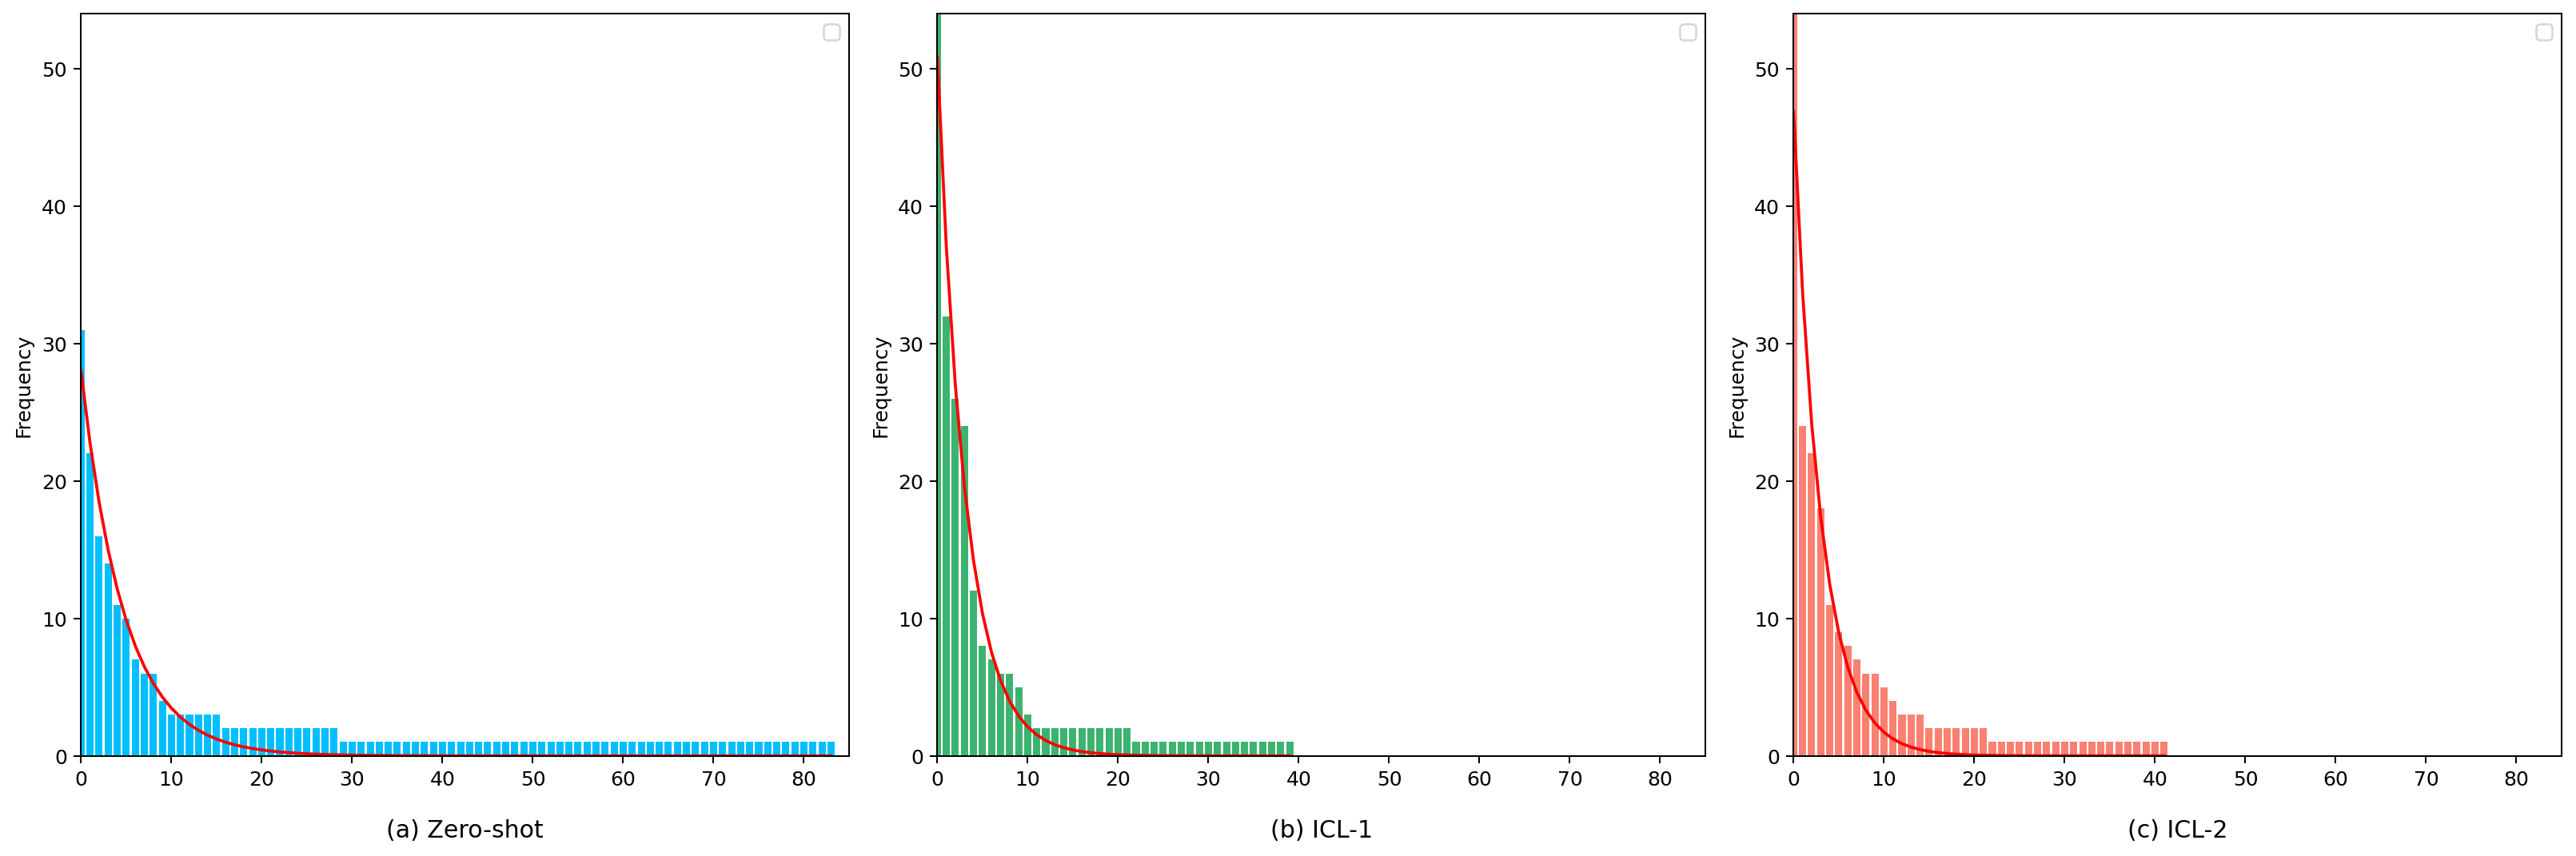

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import numpy as np
import ast
from scipy.optimize import curve_fit

# Assuming new_df2 is already loaded as df
df = new_df2.copy()

# Helper functions
def parse_list(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception as e:
            print(f"Failed to parse: {x} with error {e}")
            return []
    elif isinstance(x, list):
        return x
    else:
        return []

def exp_decay(x, a, b):
    return a * np.exp(-b * x)

sampling_type = 'frequent'
counterfactual = 'False'
ICL_option1 = 'zero-shot'
ICL_option2 = 'ICL-Few-shot-1'
ICL_option3 = 'ICL-Few-shot-2'
gender_info =  'age-group' #'age-group' #'gender' #'no_info'

columns_to_plot = [
    f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_type}_userDemo-{gender_info}_interact-{ICL_option1}_itemIds',
    f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_type}_userDemo-{gender_info}_interact-{ICL_option2}_itemIds',
    f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_type}_userDemo-{gender_info}_interact-{ICL_option3}_itemIds',
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=180)
colors = ['deepskyblue', 'mediumseagreen', 'salmon']  # Modern color palette
n_p = 85

max_frequency = 0
for col in columns_to_plot:
    item_counts = pd.Series([item for sublist in df[col].dropna() for item in parse_list(sublist)]).value_counts()
    max_frequency = max(max_frequency, item_counts.iloc[:n_p].max())

for idx, col in enumerate(columns_to_plot):
    item_counts = pd.Series([item for sublist in df[col].dropna() for item in parse_list(sublist)]).value_counts().sort_values(ascending=False)
    x_data = np.arange(len(item_counts))
    y_data = item_counts.values

    popt, _ = curve_fit(exp_decay, x_data, y_data, p0=(1, 0.01), maxfev=10000)

    ax = axes[idx]
    ax.bar(x_data[:n_p], y_data[:n_p], color=colors[idx])
    ax.plot(x_data[:n_p], exp_decay(x_data[:n_p], *popt), 'r-')

    ax.set_xlim([0, n_p])
    ax.set_ylim([0, max_frequency])

    ax.set_ylabel('Frequency')
    ax.legend(loc='upper right')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))

    # Setting legends as per the modern standards below the plot
    labels = ['(a) Zero-shot', '(b) ICL-1', '(c) ICL-2']
    ax.text(0.5, -0.1, labels[idx], size=12, ha='center', va='center', transform=ax.transAxes)

plt.tight_layout()

name = f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_type}_userDemo-{gender_info}_interact-{ICL_option1}_itemIds',

# Save the figure in PDF format
plt.savefig(f'recommenders__counterfact-{counterfactual}_sample-{sampling_type}_userDemo-{gender_info}_interact-plot.pdf', format='pdf')

#plt.show()


In [ ]:
recommendation_cols  = columns_to_plot.copy()
results = {col: {'hit_rate': [], 'average_rank': [], 'gini': 0, 'entropy': 0, 'catalog_coverage': 0} for col in recommendation_cols}

ground_truth_col = 'itemIds'

# Calculate the total number of unique items in the dataset
total_unique_items = len(set([item for sublist in df[ground_truth_col].dropna() for item in parse_list(sublist)]))

for col in recommendation_cols:
    all_recommended_items = []

    for index, row in df.iterrows():
        ground_truth = parse_list(row[ground_truth_col])
        recommendations = parse_list(row[col])
        hr = hit_rate(recommendations, ground_truth)
        ar = average_rank(recommendations, ground_truth)
        results[col]['hit_rate'].append(hr)
        results[col]['average_rank'].append(ar)
        all_recommended_items.extend(recommendations)

    item_counts = pd.Series(all_recommended_items).value_counts()
    results[col]['gini'] = gini(item_counts.values)
    results[col]['entropy'] = entropy(item_counts.values)
    results[col]['catalog_coverage'] = catalog_coverage(all_recommended_items, total_unique_items)

# Displaying the results
for col in recommendation_cols:
    avg_hit_rate = np.mean(results[col]['hit_rate'])
    avg_average_rank = np.mean(results[col]['average_rank'])
    gini_index = results[col]['gini']
    entropy_value = results[col]['entropy']
    catalog_coverage_value = results[col]['catalog_coverage']
    print(f"{col} - Average Hit Rate: {avg_hit_rate:.3f}, Average Rank: {avg_average_rank:.5f}, Gini Index: {gini_index:.5f}, Entropy: {entropy_value:.5f}, Catalog Coverage: {catalog_coverage_value:.5f}")

recommendation_for_prompt_counterfact-False_sample-frequent_userDemo-age-group_interact-zero-shot_itemIds - Average Hit Rate: 0.154, Average Rank: 0.70000, Gini Index: 0.54193, Entropy: 3.72305, Catalog Coverage: 0.03145
recommendation_for_prompt_counterfact-False_sample-frequent_userDemo-age-group_interact-ICL-Few-shot-1_itemIds - Average Hit Rate: 0.175, Average Rank: 0.57500, Gini Index: 0.67186, Entropy: 2.73694, Catalog Coverage: 0.01498
recommendation_for_prompt_counterfact-False_sample-frequent_userDemo-age-group_interact-ICL-Few-shot-2_itemIds - Average Hit Rate: 0.150, Average Rank: 0.45625, Gini Index: 0.64637, Entropy: 2.87851, Catalog Coverage: 0.01572


<ipython-input-7-40834a83bd0c>:17: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
<ipython-input-7-40834a83bd0c>:17: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x)


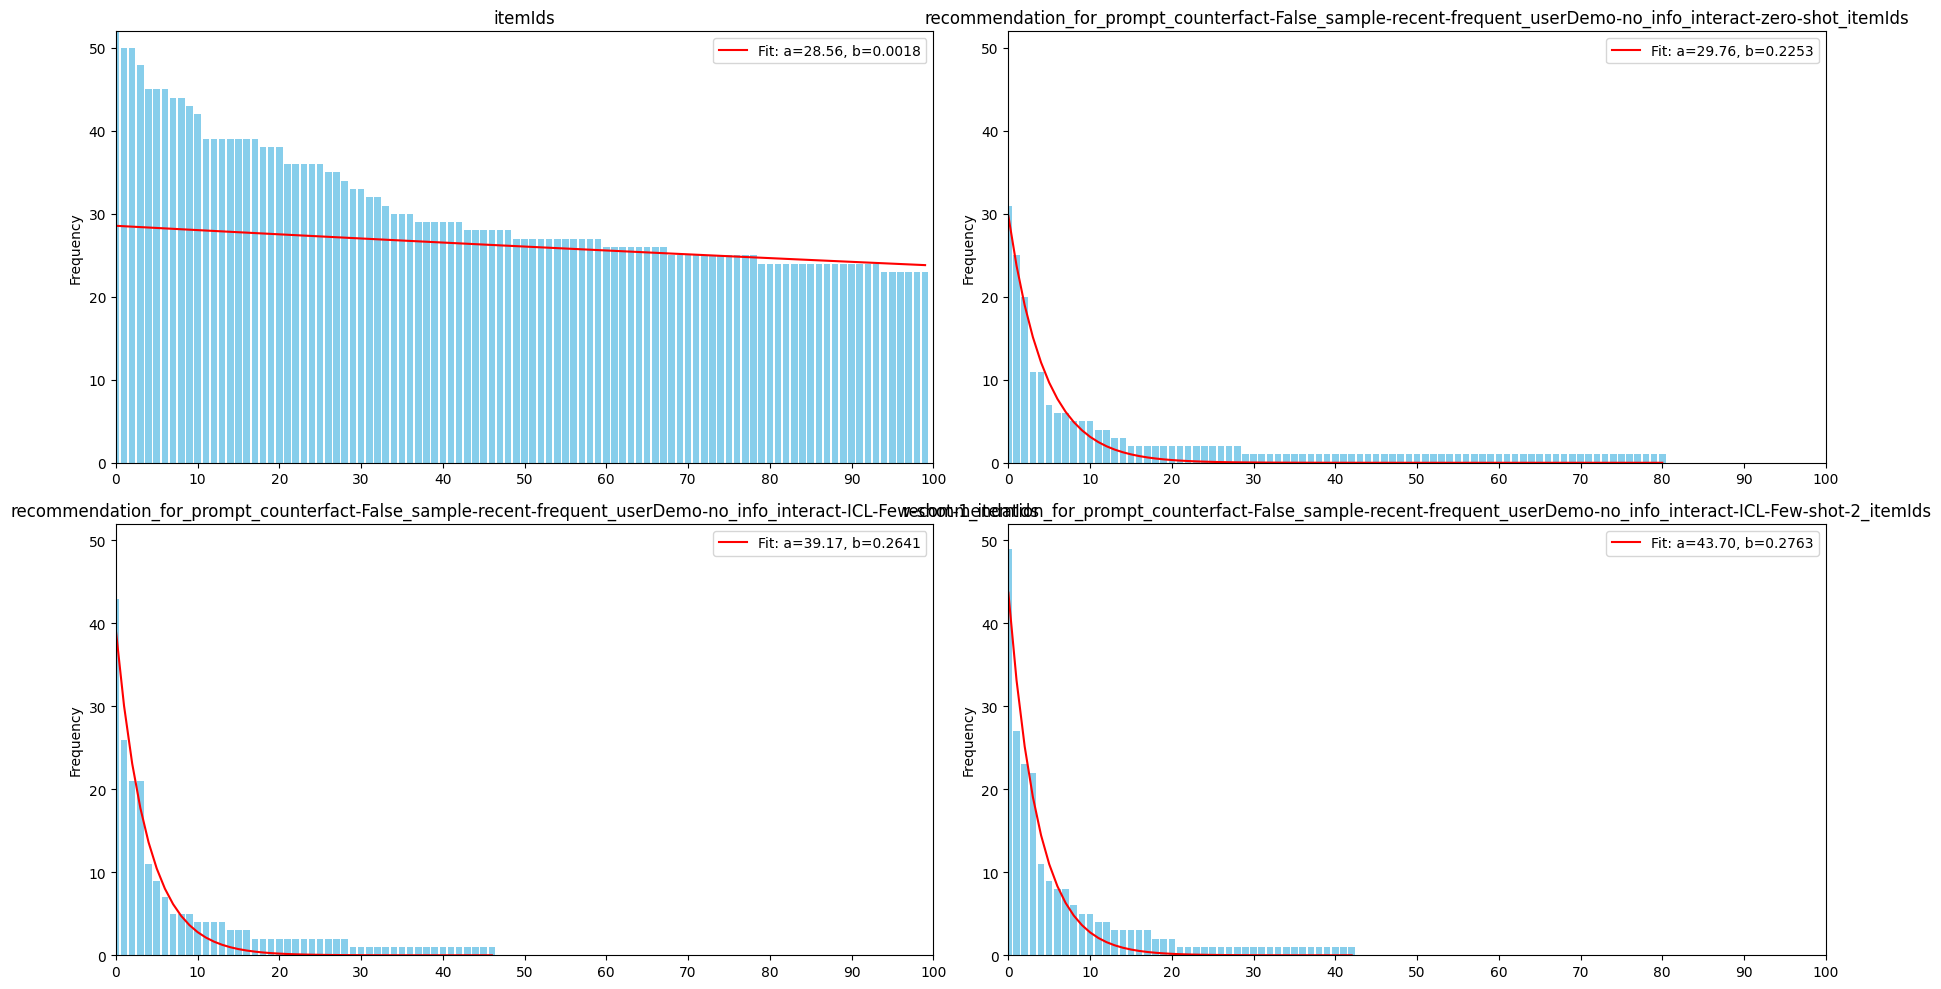

----------------------------------
recommendation_for_prompt_counterfact-False_sample-recent-frequent_userDemo-gender_interact-zero-shot_itemIds - Average Hit Rate: 0.158, Average Rank: 0.55000, Gini Index: 0.54779, Entropy: 3.68560, Catalog Coverage: 0.02958
recommendation_for_prompt_counterfact-False_sample-recent-frequent_userDemo-gender_interact-ICL-Few-shot-1_itemIds - Average Hit Rate: 0.154, Average Rank: 0.46250, Gini Index: 0.64715, Entropy: 2.99814, Catalog Coverage: 0.01909
recommendation_for_prompt_counterfact-False_sample-recent-frequent_userDemo-gender_interact-ICL-Few-shot-2_itemIds - Average Hit Rate: 0.175, Average Rank: 0.50625, Gini Index: 0.64839, Entropy: 2.73183, Catalog Coverage: 0.01310


In [ ]:
df = new_df2.copy()

# Helper functions
def parse_list(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception as e:
            print(f"Failed to parse: {x} with error {e}")
            return []
    elif isinstance(x, list):
        return x
    else:
        return []

def exp_decay(x, a, b):
    return a * np.exp(-b * x)

sampling_type = 'recent-frequent'
user_infos = 'gender'
counterfactual = 'False'
ICL_option1 = 'zero-shot'
ICL_option2 = 'ICL-Few-shot-1'
ICL_option3 = 'ICL-Few-shot-2'

columns_to_plot = [
    f'itemIds',
    f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_type}_userDemo-no_info_interact-{ICL_option1}_itemIds',
    f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_type}_userDemo-no_info_interact-{ICL_option2}_itemIds',
    f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_type}_userDemo-no_info_interact-{ICL_option3}_itemIds',
]
fig, axes = plt.subplots(2, 2, figsize=(18, 10), dpi=100)
axes = axes.flatten()

max_frequency = 0
for col in columns_to_plot:
    item_counts = pd.Series([item for sublist in df[col].dropna() for item in parse_list(sublist)]).value_counts()
    if len(item_counts) > 100:
        max_frequency = max(max_frequency, item_counts.iloc[:100].max())

for idx, col in enumerate(columns_to_plot):
    item_counts = pd.Series([item for sublist in df[col].dropna() for item in parse_list(sublist)]).value_counts().sort_values(ascending=False)
    x_data = np.arange(len(item_counts))
    y_data = item_counts.values

    popt, _ = curve_fit(exp_decay, x_data, y_data, p0=(1, 0.01), maxfev=10000)

    ax = axes[idx]
    ax.bar(x_data[:100], y_data[:100], color='skyblue')
    ax.plot(x_data[:100], exp_decay(x_data[:100], *popt), 'r-', label=f'Fit: a={popt[0]:.2f}, b={popt[1]:.4f}')

    ax.set_xlim([0, 100])
    ax.set_ylim([0, max_frequency])

    ax.set_title(col)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))

plt.tight_layout()
plt.show()

print('----------------------------------')

# Update ground truth and recommendation columns for analysis
counterfactual = 'False'
ICL_option1 = 'zero-shot'
ICL_option2 = 'ICL-Few-shot-1'
ICL_option3 = 'ICL-Few-shot-2'

ground_truth_col = 'itemIds'
recommendation_cols = [
    f'recommendation_for_prompt_counterfact-False_sample-{sampling_type}_userDemo-{user_infos}_interact-zero-shot_itemIds',
    f'recommendation_for_prompt_counterfact-False_sample-{sampling_type}_userDemo-{user_infos}_interact-ICL-Few-shot-1_itemIds',
    f'recommendation_for_prompt_counterfact-False_sample-{sampling_type}_userDemo-{user_infos}_interact-ICL-Few-shot-2_itemIds',
]

results = {col: {'hit_rate': [], 'average_rank': [], 'gini': 0, 'entropy': 0, 'catalog_coverage': 0} for col in recommendation_cols}

# Calculate the total number of unique items in the dataset
total_unique_items = len(set([item for sublist in df[ground_truth_col].dropna() for item in parse_list(sublist)]))

for col in recommendation_cols:
    all_recommended_items = []

    for index, row in df.iterrows():
        ground_truth = parse_list(row[ground_truth_col])
        recommendations = parse_list(row[col])
        hr = hit_rate(recommendations, ground_truth)
        ar = average_rank(recommendations, ground_truth)
        results[col]['hit_rate'].append(hr)
        results[col]['average_rank'].append(ar)
        all_recommended_items.extend(recommendations)

    item_counts = pd.Series(all_recommended_items).value_counts()
    results[col]['gini'] = gini(item_counts.values)
    results[col]['entropy'] = entropy(item_counts.values)
    results[col]['catalog_coverage'] = catalog_coverage(all_recommended_items, total_unique_items)

# Displaying the results
for col in recommendation_cols:
    avg_hit_rate = np.mean(results[col]['hit_rate'])
    avg_average_rank = np.mean(results[col]['average_rank'])
    gini_index = results[col]['gini']
    entropy_value = results[col]['entropy']
    catalog_coverage_value = results[col]['catalog_coverage']
    print(f"{col} - Average Hit Rate: {avg_hit_rate:.3f}, Average Rank: {avg_average_rank:.5f}, Gini Index: {gini_index:.5f}, Entropy: {entropy_value:.5f}, Catalog Coverage: {catalog_coverage_value:.5f}")

<ipython-input-21-9f7a69cba8f1>:16: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
<ipython-input-21-9f7a69cba8f1>:16: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x)


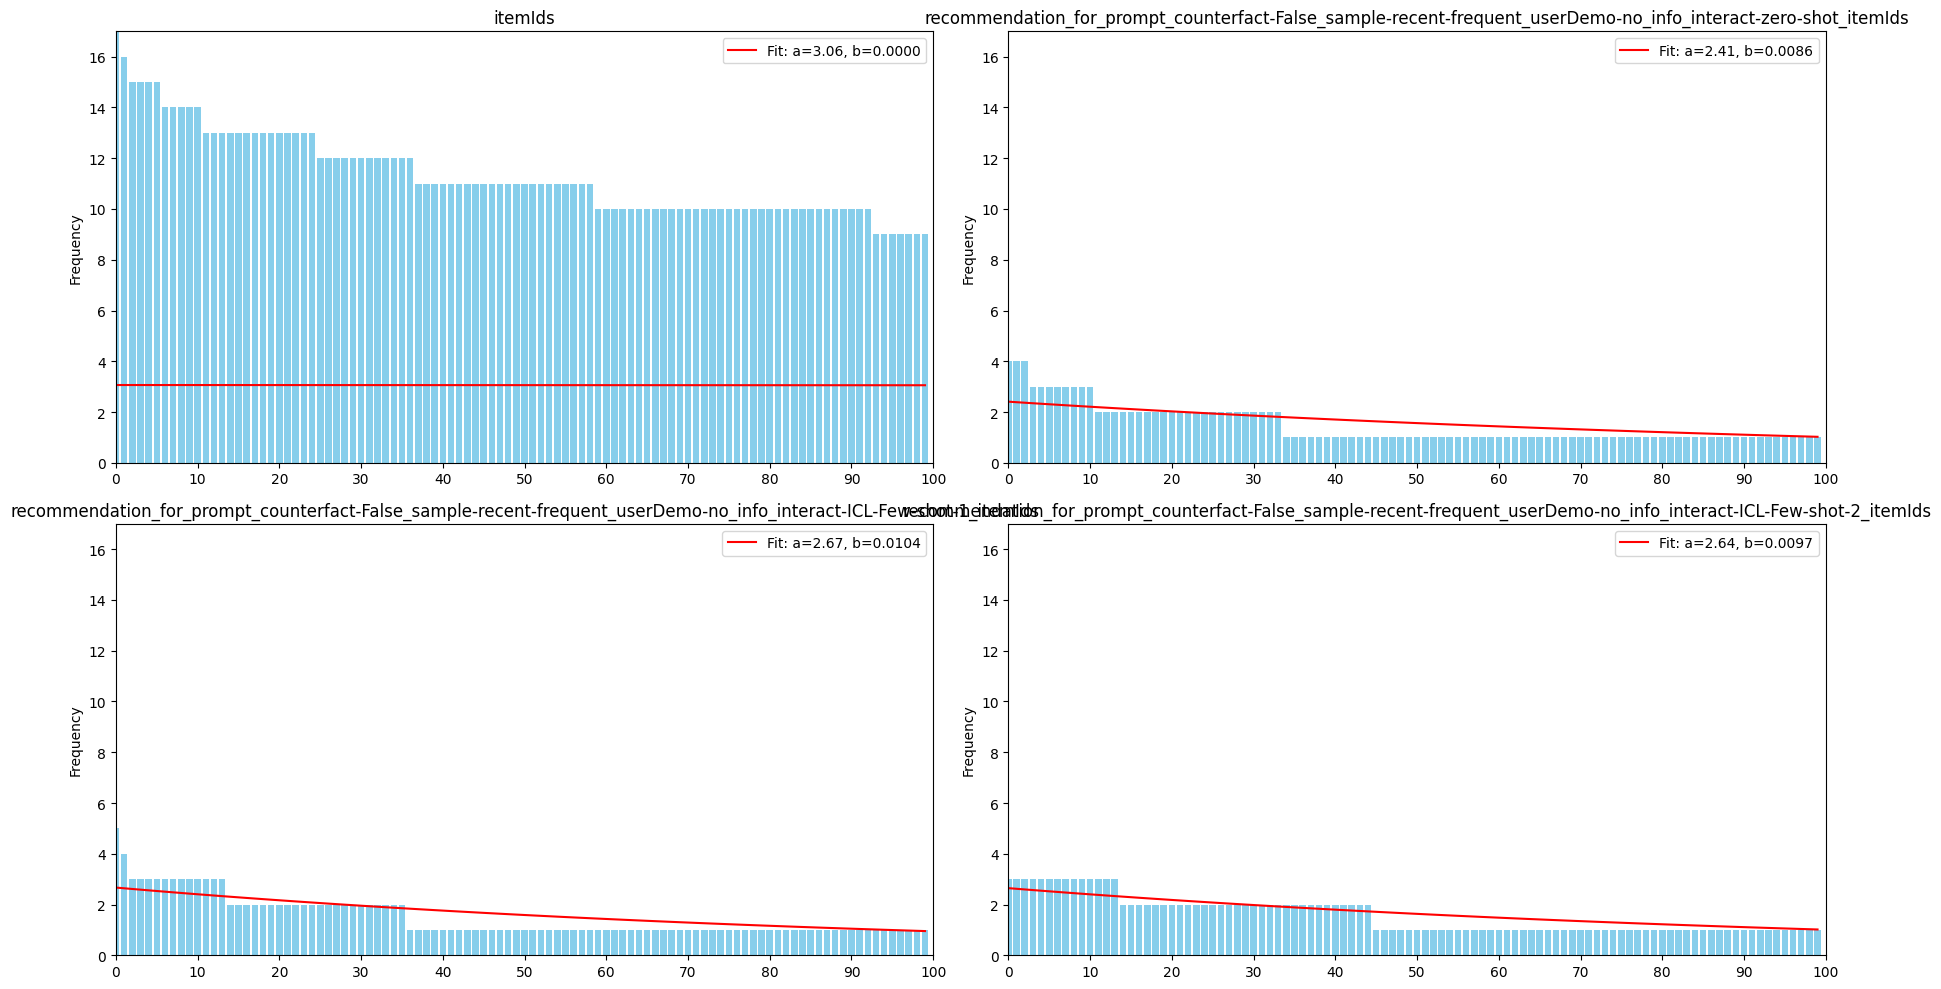

----------------------------------
recommendation_for_prompt_counterfact-False_sample-recent-frequent_userDemo-intersectional_interact-zero-shot_itemIds - Average Hit Rate: 0.21, Average Rank: 0.5938, Gini Index: 0.1729, Entropy: 5.1050, Catalog Coverage: 0.0023
recommendation_for_prompt_counterfact-False_sample-recent-frequent_userDemo-intersectional_interact-ICL-Few-shot-1_itemIds - Average Hit Rate: 0.19, Average Rank: 0.5813, Gini Index: 0.2116, Entropy: 4.9947, Catalog Coverage: 0.0021
recommendation_for_prompt_counterfact-False_sample-recent-frequent_userDemo-intersectional_interact-ICL-Few-shot-2_itemIds - Average Hit Rate: 0.18, Average Rank: 0.5125, Gini Index: 0.1907, Entropy: 4.9895, Catalog Coverage: 0.0020


In [ ]:
df = new_df2.copy()

def parse_list(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception as e:
            print(f"Failed to parse: {x} with error {e}")
            return []
    elif isinstance(x, list):
        return x
    else:
        return []

def exp_decay(x, a, b):
    return a * np.exp(-b * x)

sampling_type = 'recent-frequent'
user_infos = 'no_info'
counterfactual = 'False'
ICL_option1 = 'zero-shot'
ICL_option2 = 'ICL-Few-shot-1'
ICL_option3 = 'ICL-Few-shot-2'

columns_to_plot = [
    f'itemIds',
    f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_type}_userDemo-no_info_interact-{ICL_option1}_itemIds',
    f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_type}_userDemo-no_info_interact-{ICL_option2}_itemIds',
    f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_type}_userDemo-no_info_interact-{ICL_option3}_itemIds',
]

fig, axes = plt.subplots(2, 2, figsize=(18, 10), dpi=100)
axes = axes.flatten()

max_frequency = 0
for col in columns_to_plot:
    item_counts = pd.Series([item for sublist in df[col].dropna() for item in parse_list(sublist)]).value_counts()
    if len(item_counts) > 100:
        max_frequency = max(max_frequency, item_counts.iloc[:100].max())

for idx, col in enumerate(columns_to_plot):
    item_counts = pd.Series([item for sublist in df[col].dropna() for item in parse_list(sublist)]).value_counts().sort_values(ascending=False)
    x_data = np.arange(len(item_counts))
    y_data = item_counts.values

    popt, _ = curve_fit(exp_decay, x_data, y_data, p0=(1, 0.01), maxfev=10000)

    ax = axes[idx]
    ax.bar(x_data[:100], y_data[:100], color='skyblue')
    ax.plot(x_data[:100], exp_decay(x_data[:100], *popt), 'r-', label=f'Fit: a={popt[0]:.2f}, b={popt[1]:.4f}')

    ax.set_xlim([0, 100])
    ax.set_ylim([0, max_frequency])

    ax.set_title(col)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))

plt.tight_layout()
plt.show()

print('----------------------------------')

sampling_type = 'recent-frequent'
user_infos = 'intersectional'
counterfactual = 'False'
ICL_option1 = 'zero-shot'
ICL_option2 = 'ICL-Few-shot-1'
ICL_option3 = 'ICL-Few-shot-2'

ground_truth_col = 'itemIds'
recommendation_cols = [
    f'recommendation_for_prompt_counterfact-False_sample-{sampling_type}_userDemo-{user_infos}_interact-zero-shot_itemIds',
    f'recommendation_for_prompt_counterfact-False_sample-{sampling_type}_userDemo-{user_infos}_interact-ICL-Few-shot-1_itemIds',
    f'recommendation_for_prompt_counterfact-False_sample-{sampling_type}_userDemo-{user_infos}_interact-ICL-Few-shot-2_itemIds',
]

results = {col: {'hit_rate': [], 'average_rank': [], 'gini': 0, 'entropy': 0, 'catalog_coverage': 0} for col in recommendation_cols}

# Calculate the total number of unique items in the dataset
total_unique_items = len(set([item for sublist in df[ground_truth_col].dropna() for item in parse_list(sublist)]))

for col in recommendation_cols:
    all_recommended_items = []

    for index, row in df.iterrows():
        ground_truth = parse_list(row[ground_truth_col])
        recommendations = parse_list(row[col])
        hr = hit_rate(recommendations, ground_truth)
        ar = average_rank(recommendations, ground_truth)
        results[col]['hit_rate'].append(hr)
        results[col]['average_rank'].append(ar)
        all_recommended_items.extend(recommendations)

    item_counts = pd.Series(all_recommended_items).value_counts()
    results[col]['gini'] = gini(item_counts.values)
    results[col]['entropy'] = entropy(item_counts.values)
    results[col]['catalog_coverage'] = catalog_coverage(all_recommended_items, total_unique_items)

# Displaying the results
for col in recommendation_cols:
    avg_hit_rate = np.mean(results[col]['hit_rate'])
    avg_average_rank = np.mean(results[col]['average_rank'])
    gini_index = results[col]['gini']
    entropy_value = results[col]['entropy']
    catalog_coverage_value = results[col]['catalog_coverage']
    print(f"{col} - Average Hit Rate: {avg_hit_rate:.2f}, Average Rank: {avg_average_rank:.4f}, Gini Index: {gini_index:.4f}, Entropy: {entropy_value:.4f}, Catalog Coverage: {catalog_coverage_value:.4f}")

In [ ]:
df = new_df2.copy()

def parse_list(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception as e:
            print(f"Failed to parse: {x} with error {e}")
            return []
    elif isinstance(x, list):
        return x
    else:
        return []

# Define exponential decay function
def exp_decay(x, a, b):
    return a * np.exp(-b * x)

sampling_type = 'frequent' #'frequent'
user_infos = 'no-info' #'gender'
counterfactual = 'False'
ICL_option1 = 'zero-shot'
ICL_option2 = 'ICL-Few-shot-1'
ICL_option3 = 'ICL-Few-shot-2'

# Assuming df is loaded with the relevant data
columns_to_plot = [
    f'itemIds',
    f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_type}_userDemo-no_info_interact-{ICL_option1}_itemIds',
    f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_type}_userDemo-no_info_interact-{ICL_option2}_itemIds',
    f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_type}_userDemo-no_info_interact-{ICL_option3}_itemIds',
]


fig, axes = plt.subplots(2, 2, figsize=(18, 10), dpi=100)
axes = axes.flatten()

# Determine the maximum frequency among the top 100 items for standardizing y-axis scale
max_frequency = 0
for col in columns_to_plot:
    item_counts = pd.Series([item for sublist in df[col].dropna() for item in parse_list(sublist)]).value_counts()
    if len(item_counts) > 100:
        max_frequency = max(max_frequency, item_counts.iloc[:100].max())

for idx, col in enumerate(columns_to_plot):
    # Get data and sort
    item_counts = pd.Series([item for sublist in df[col].dropna() for item in parse_list(sublist)]).value_counts().sort_values(ascending=False)
    x_data = np.arange(len(item_counts))
    y_data = item_counts.values

    # Fit exponential decay
    popt, _ = curve_fit(exp_decay, x_data, y_data, p0=(1, 0.01), maxfev=10000)

    ax = axes[idx]
    ax.bar(x_data[:100], y_data[:100], color='skyblue')
    ax.plot(x_data[:100], exp_decay(x_data[:100], *popt), 'r-', label=f'Fit: a={popt[0]:.2f}, b={popt[1]:.4f}')

    # Set uniform x and y axis limits
    ax.set_xlim([0, 100])
    ax.set_ylim([0, max_frequency])

    # Label adjustments
    ax.set_title(col)
    ax.set_ylabel('Frequency')
    ax.legend()

    # Limit number of x-axis ticks to avoid clutter
    ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))

plt.tight_layout()
plt.show()


print('----------------------------------')


sampling_type = 'recent-frequent' #, 'frequent' #'frequent'
user_infos = 'no_info' #'gender'
counterfactual = 'False'
ICL_option1 = 'zero-shot'
ICL_option2 = 'ICL-Few-shot-1'
ICL_option3 = 'ICL-Few-shot-2'

# List of column names for recommendations and ground truth
ground_truth_col = 'itemIds'
recommendation_cols = [
    f'recommendation_for_prompt_counterfact-False_sample-{sampling_type}_userDemo-{user_infos}_interact-zero-shot_itemIds',
    f'recommendation_for_prompt_counterfact-False_sample-{sampling_type}_userDemo-{user_infos}_interact-ICL-Few-shot-1_itemIds',
    f'recommendation_for_prompt_counterfact-False_sample-{sampling_type}_userDemo-{user_infos}_interact-ICL-Few-shot-2_itemIds',
]

# Calculate hit rates and average ranks for each recommendation type
results = {col: {'hit_rate': [], 'average_rank': []} for col in recommendation_cols}

for index, row in df.iterrows():
    ground_truth = parse_list(row[ground_truth_col])
    for col in recommendation_cols:
        recommendations = parse_list(row[col])
        hr = hit_rate(recommendations, ground_truth)
        ar = average_rank(recommendations, ground_truth)
        results[col]['hit_rate'].append(hr)
        results[col]['average_rank'].append(ar)

# Displaying the results
for col in recommendation_cols:
    avg_hit_rate = np.mean(results[col]['hit_rate'])
    avg_average_rank = np.mean(results[col]['average_rank'])
    print(f"{col} - Average Hit Rate: {avg_hit_rate:.2f}, Average Rank: {avg_average_rank:.2f}")

In [ ]:
len(new_df2.columns)

75

In [ ]:
import pandas as pd
import ast



# Function to safely convert string representations of lists to actual lists
def safe_literal_eval(data):
    if isinstance(data, str):
        try:
            return ast.literal_eval(data)
        except (ValueError, SyntaxError) as e:
            print("Error evaluating data:", e)
            return []
    return data

target_attr = 'gender'
if target_attr == 'gender':
  a1 = "Male"
  a2 = "Female"
  var = 'gender'
elif target_attr == 'age-group':
  a1 = "Early Adult (≤24 yrs)"
  a2 = "Mid Adult (>24 yrs)"
  var = "age_group"


ICL_options = ['zero-shot', 'ICL-Few-shot-1', 'ICL-Few-shot-2']
ICL_options = ['zero-shot']
ICL_options = ['ICL-Few-shot-1']
ICL_options = ['ICL-Few-shot-2']

sampling_strategy_list = ['random', 'frequent','recent-frequent']
sampling_strategy_list = ['recent-frequent']

user_infos_list = ['gender', 'age-group', 'intersectional']
if target_attr == 'gender':
  user_infos_list = [target_attr]
elif target_attr == 'age-group':
  user_infos_list = [target_attr]

counterfactual_list = ['False']
# Initialize an empty dataframe to store results
results_df = pd.DataFrame(columns=['userId', 'gender', 'age_group', 'itemIds', 'artistIds' , 'HR_sen', 'HR_ref', 'Diff_HR', 'AR_sen', 'Ar_ref', 'Diff_AR'])
results_df = pd.DataFrame(columns=['userId', 'gender', 'age_group', 'itemIds', 'HR_sen', 'HR_ref', 'Diff_HR', 'AR_sen', 'Ar_ref', 'Diff_AR'])

# Initialize dictionaries for actual and counterfactual groups
actual_hr = {a1: [], a2: []}
actual_ar = {a1: [], a2: []}
counterfactual_hr = {a1: [], a2: []}
counterfactual_ar = {a1: [], a2: []}

cnt = 0
for user_infos in user_infos_list:
  for counterfactual in counterfactual_list:
    for sampling_strategy in sampling_strategy_list:
      for ICL_option in ICL_options:
        for index, user_data in new_df2.iterrows():
            # Extract ground truth, neutral list, and sensitive list
            ground_truth = user_data['itemIds']
            neutral_list = user_data[f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_strategy}_userDemo-no_info_interact-{ICL_option}_itemIds']
            sensitive_list = user_data[f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_strategy}_userDemo-{user_infos}_interact-{ICL_option}_itemIds']
            cnt_sensitive_list = user_data[f'recommendation_for_prompt_counterfact-True_sample-{sampling_strategy}_userDemo-{user_infos}_interact-{ICL_option}_itemIds']


            # Use the function to ensure all variables are lists
            ground_truth = safe_literal_eval(ground_truth)
            neutral_list = safe_literal_eval(neutral_list)
            sensitive_list = safe_literal_eval(sensitive_list)
            cnt_sensitive_list = safe_literal_eval(cnt_sensitive_list)

            # Check the types to confirm they are now lists
            # Calculate Hit Rate
            hit_rate_score_ref = hit_rate(neutral_list, ground_truth, top_k=top_k)
            hit_rate_score_sen = hit_rate(sensitive_list, ground_truth, top_k=top_k)
            hit_rate_score_cnt_sen = hit_rate(cnt_sensitive_list, ground_truth, top_k=top_k)


            # Calculate Average Rank
            average_rank_score_ref = average_rank(neutral_list, ground_truth)
            average_rank_score_sen = average_rank(sensitive_list, ground_truth)
            average_rank_score_cnt_sen = average_rank(cnt_sensitive_list, ground_truth)

            Delta_hit = hit_rate_score_sen- hit_rate_score_ref
            Delta_avg_rank = average_rank_score_sen - average_rank_score_ref

            Delta_hit_cf = hit_rate_score_cnt_sen- hit_rate_score_ref
            Delta_avg_rank_cf = average_rank_score_cnt_sen - average_rank_score_ref

            if user_data[var] == a1:
              counterfactual_hr[a2].append(Delta_hit_cf)
              counterfactual_ar[a2].append(Delta_avg_rank_cf)
            else:
              counterfactual_hr[a1].append(Delta_hit_cf)
              counterfactual_ar[a1].append(Delta_avg_rank_cf)

            if user_data[var] == a1:
              actual_hr[a1].append(Delta_hit)
              actual_ar[a1].append(Delta_avg_rank)
            else:
              actual_hr[a2].append(Delta_hit)
              actual_ar[a2].append(Delta_avg_rank)

            # results_df.loc[len(results_df)] = [user_data['userId'], user_data['gender'], user_data['age_group'], user_data['itemIds'],
            #                                    user_data['artistIds'], hit_rate_score_sen, hit_rate_score_ref, Delta_hit,
            #                                    average_rank_score_sen, average_rank_score_sen, Delta_avg_rank]

            results_df.loc[len(results_df)] = [user_data['userId'], user_data['gender'], user_data['age_group'], user_data['itemIds'],
                                               hit_rate_score_sen, hit_rate_score_ref, Delta_hit,
                                               average_rank_score_sen, average_rank_score_sen, Delta_avg_rank]
        cnt = cnt+1
        print(f"Setting {cnt}:  (user_infos, counterfactual, sampling_strategy, ICL_option) = {user_infos, counterfactual, sampling_strategy, ICL_option})")
        # average_hit_rate = results_df['Hit_rate'].mean()
        # average_average_rank = results_df['Average_rank'].mean()
        # print(f"Average Hit Rate: {average_hit_rate}")
        # print(f"Average Average Rank: {average_average_rank}")
        # print("---------------------------------------------------")

Setting 1:  (user_infos, counterfactual, sampling_strategy, ICL_option) = ('gender', 'False', 'recent-frequent', 'ICL-Few-shot-2'))


## Neutral to counterfactual Sensitive Deviation (NCSD)


In [ ]:
import numpy as np
from scipy import stats

# Calculate the SNSR, which is the difference between the max and min delta values for hit rates and average ranks.
snsr_hr = max(max(counterfactual_hr[a1]), max(counterfactual_hr[a2])) - min(min(counterfactual_hr[a1]), min(counterfactual_hr[a2]))
snsr_ar = max(max(counterfactual_ar[a1]), max(counterfactual_ar[a2])) - min(min(counterfactual_ar[a1]), min(counterfactual_ar[a2]))

# Calculate the SNSV, which is the standard deviation of the delta values for hit rates and average ranks.
snsv_hr = np.sqrt((np.var(counterfactual_hr[a1]) + np.var(counterfactual_hr[a2])) / 2)
snsv_ar = np.sqrt((np.var(counterfactual_ar[a1]) + np.var(counterfactual_ar[a2])) / 2)

snsr_hr, snsr_ar, snsv_hr, snsv_ar

# Average of the Delta_hit_cf for male and female counterfactuals
dHR_male_cf = np.mean(counterfactual_hr[a1])
dHR_female_cf = np.mean(counterfactual_hr[a2])

# Average of the Delta_avg_rank_cf for male and female counterfactuals
dAR_male_cf = np.mean(counterfactual_ar[a1])
dAR_female_cf = np.mean(counterfactual_ar[a2])

# Perform a t-test for independent samples
t_stat_hr_cf, p_value_hr_cf = stats.ttest_ind(counterfactual_hr[a1], counterfactual_hr[a2], equal_var=False)
t_stat_ar_cf, p_value_ar_cf = stats.ttest_ind(counterfactual_ar[a1], counterfactual_ar[a2], equal_var=False)

# Format the \delta values with p-values and apply bold formatting if significant
def format_with_p_value_cf(delta, p_value):
    if p_value < 0.05:
        # Apply bold formatting in LaTeX
        return '\\textbf{' + str(round(delta, 4)) + ' (p=' + f'{p_value:.3f}' + ')}'
    else:
        return str(round(delta, 4)) + ' (p=' + f'{p_value:.3f}' + ')'

values_cf = {
    'dHR_male': str(round(dHR_male_cf, 4)),
    'dHR_female': str(round(dHR_female_cf, 4)),
    'e1': format_with_p_value_cf(dHR_male_cf - dHR_female_cf, p_value_hr_cf),
    'SNSR_HR': str(round(snsr_hr, 4)),
    'SNSV_HR': str(round(snsv_hr, 4)),
    'dAR_male': str(round(dAR_male_cf, 4)),
    'dAR_female': str(round(dAR_female_cf, 4)),
    'e2': format_with_p_value_cf(dAR_male_cf - dAR_female_cf, p_value_ar_cf),
    'SNSR_AR': str(round(snsr_ar, 4)),
    'SNSV_AR': str(round(snsv_ar, 4))
}

# Define the order of the keys as they should appear in the LaTeX table
keys_order = ['dHR_male', 'dHR_female', 'e1', 'SNSR_HR', 'SNSV_HR', 'dAR_male', 'dAR_female', 'e2', 'SNSR_AR', 'SNSV_AR']

# Format the values into a LaTeX table row string
latex_row_cf = ' & '.join([values_cf[key] for key in keys_order])

# Print the LaTeX row
print("&" + latex_row_cf)


&0.0635 & 0.0113 & 0.0522 (p=0.366) & 1.6667 & 0.2421 & 0.3333 & 0.1695 & 0.1638 (p=0.566) & 6.0 & 1.0015


## Neutral-to-Sensitive-Deviation (NSD)




In [ ]:
import numpy as np
from scipy import stats

# Calculate the SNSR, which is the difference between the max and min delta values for hit rates and average ranks.
snsr_hr = max(max(actual_hr[a1]), max(actual_hr[a2])) - min(min(actual_hr[a1]), min(actual_hr[a2]))
snsr_ar = max(max(actual_ar[a1]), max(actual_ar[a2])) - min(min(actual_ar[a1]), min(actual_ar[a2]))

# Calculate the SNSV, which is the standard deviation of the delta values for hit rates and average ranks.
snsv_hr = np.sqrt((np.var(actual_hr[a1]) + np.var(actual_hr[a2])) / 2)
snsv_ar = np.sqrt((np.var(actual_ar[a1]) + np.var(actual_ar[a2])) / 2)

snsr_hr, snsr_ar, snsv_hr, snsv_ar

# Here's a Python snippet that formats the given values into a LaTeX table row with ampersands.
# Average of the Delta_hit for male and female
dHR_male = np.mean(actual_hr[a1])
dHR_female = np.mean(actual_hr[a2])

# Average of the Delta_avg_rank for male and female
dAR_male = np.mean(actual_ar[a1])
dAR_female = np.mean(actual_ar[a2])

# Perform a t-test for independent samples
t_stat_hr, p_value_hr = stats.ttest_ind(actual_hr[a1], actual_hr[a2], equal_var=False)
t_stat_ar, p_value_ar = stats.ttest_ind(actual_ar[a1], actual_ar[a2], equal_var=False)

print("T-statistic for Hit Rate:", t_stat_hr, "P-value:", p_value_hr)
print("T-statistic for Average Rank:", t_stat_ar, "P-value:", p_value_ar)

# Format the \delta values with p-values and apply bold formatting if significant
def format_with_p_value(delta, p_value):
    if p_value < 0.05:
        # Apply bold formatting in LaTeX
        return '\\textbf{' + str(round(delta, 4)) + ' (p=' + f'{p_value:.3f}' + ')}'
    else:
        return str(round(delta, 4)) + ' (p=' + f'{p_value:.3f}' + ')'

# Prepare values with p-values for LaTeX table
values_with_p = {
    'dHR_male': str(round(dHR_male, 4)),
    'dHR_female': str(round(dHR_female, 4)),
    'e1': format_with_p_value(dHR_male - dHR_female, p_value_hr),
    'SNSR_HR': str(round(snsr_hr, 4)),
    'SNSV_HR': str(round(snsv_hr, 4)),
    'dAR_male': str(round(dAR_male, 4)),
    'dAR_female': str(round(dAR_female, 4)),
    'e2': format_with_p_value(dAR_male - dAR_female, p_value_ar),
    'SNSR_AR': str(round(snsr_ar, 4)),
    'SNSV_AR': str(round(snsv_ar, 4))
}

# Define the order of the keys as they should appear in the LaTeX table
keys_order = ['dHR_male', 'dHR_female', 'e1', 'SNSR_HR', 'SNSV_HR', 'dAR_male', 'dAR_female', 'e2', 'SNSR_AR', 'SNSV_AR']

print("------------------------------------------------------------------")
# Format the values into a LaTeX table row string
latex_row = ' & '.join([values_with_p[key] for key in keys_order])

# Print the LaTeX row
print(latex_row)


T-statistic for Hit Rate: -0.4351766437923318 P-value: 0.6651260363326159
T-statistic for Average Rank: -0.8414914710326645 P-value: 0.40565367832098476
------------------------------------------------------------------
-0.0056 & 0.0159 & -0.0215 (p=0.665) & 1.3333 & 0.2146 & -0.1186 & 0.0952 & -0.2139 (p=0.406) & 6.0 & 0.9886


<ipython-input-10-fbbbf4a5cdc2>:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


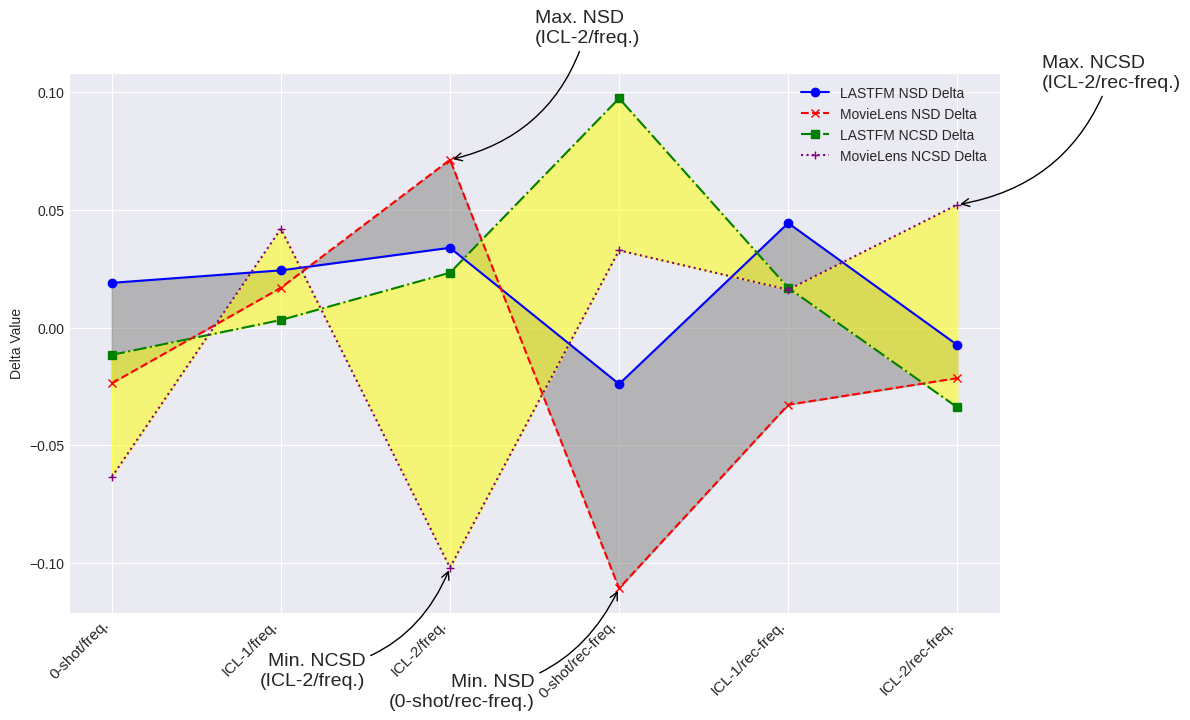

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Category labels and their positions
categories = [
    "0-shot/freq.", "ICL-1/freq.", "ICL-2/freq.",
    "0-shot/rec-freq.", "ICL-1/rec-freq.", "ICL-2/rec-freq."
]
x = np.arange(len(categories))  # Numeric x-axis for plotting

# LASTFM and MovieLens NSD and NCSD Delta values
nsd_lastfm_delta = [0.019, 0.0243, 0.0339, -0.024, 0.0444, -0.0074]
nsd_movielens_delta = [-0.0237, 0.0169, 0.0713, -0.1108, -0.0328, -0.0215]
ncsd_lastfm_delta = [-0.0116, 0.0032, 0.0233, 0.0974, 0.0169, -0.0339]
ncsd_movielens_delta = [-0.0635, 0.042, -0.102, 0.0328, 0.0161, 0.0522]

# Setup plot with modern style
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(12, 7))

# # Adjust font size using the 'fontsize' parameter in annotation
# ax.annotate('Sample Annotation', xy=(3, 0.05), xytext=(3, 0.1),
#             textcoords='data', ha='center', fontsize=12,
#             arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))


# Plotting all curves
ax.plot(x, nsd_lastfm_delta, label='LASTFM NSD Delta', marker='o', linestyle='-', color='blue')
ax.plot(x, nsd_movielens_delta, label='MovieLens NSD Delta', marker='x', linestyle='--', color='red')
ax.plot(x, ncsd_lastfm_delta, label='LASTFM NCSD Delta', marker='s', linestyle='-.', color='green')
ax.plot(x, ncsd_movielens_delta, label='MovieLens NCSD Delta', marker='+', linestyle=':', color='purple')

# Fill between curves for visual emphasis
ax.fill_between(x, nsd_lastfm_delta, nsd_movielens_delta, color='gray', alpha=0.51)
ax.fill_between(x, ncsd_lastfm_delta, ncsd_movielens_delta, color='yellow', alpha=0.51)

# Find min and max points for MovieLens NSD and NCSD
min_idx_nsd = np.argmin(nsd_movielens_delta)
max_idx_nsd = np.argmax(nsd_movielens_delta)
min_idx_ncsd = np.argmin(ncsd_movielens_delta)
max_idx_ncsd = np.argmax(ncsd_movielens_delta)

# Annotations for significant min/max points
ax.annotate(f'Min. NSD\n({categories[min_idx_nsd]})', xy=(min_idx_nsd, nsd_movielens_delta[min_idx_nsd]),
            xytext=(min_idx_nsd-0.5, nsd_movielens_delta[min_idx_nsd] - 0.05), ha='right', fontsize=14,
            arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=.3'))
ax.annotate(f'Max. NSD\n({categories[max_idx_nsd]})', xy=(max_idx_nsd, nsd_movielens_delta[max_idx_nsd]),
            xytext=(max_idx_nsd+0.5, nsd_movielens_delta[max_idx_nsd] + 0.05), ha='left',fontsize=14,
            arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=-.3'))
ax.annotate(f'Min. NCSD\n({categories[min_idx_ncsd]})', xy=(min_idx_ncsd, ncsd_movielens_delta[min_idx_ncsd]),
            xytext=(min_idx_ncsd-0.5, ncsd_movielens_delta[min_idx_ncsd] - 0.05), ha='right', fontsize=14,
            arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=.3'))
ax.annotate(f'Max. NCSD\n({categories[max_idx_ncsd]})', xy=(max_idx_ncsd, ncsd_movielens_delta[max_idx_ncsd]),
            xytext=(max_idx_ncsd+0.5, ncsd_movielens_delta[max_idx_ncsd] + 0.05), ha='left', fontsize=14,
            arrowprops=dict(facecolor='brown', arrowstyle='->', connectionstyle='arc3,rad=-.3'))

# Set x-axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right", fontsize=11)
#ax.set_title('NSD and NCSD Delta Values Comparison Across Categories')
ax.set_ylabel('Delta Value')
ax.legend()
plt.savefig('myplot.pdf')
plt.show()


<ipython-input-11-71a9746de865>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=45, ha="right")


NameError: name 'lastfm_ssnr' is not defined

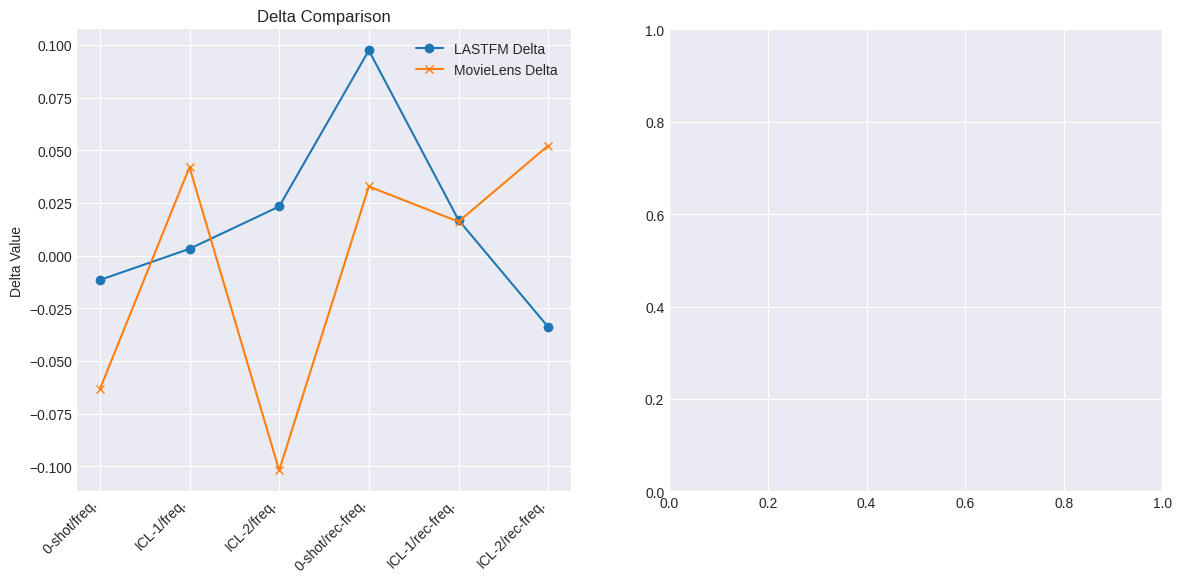

In [ ]:
import matplotlib.pyplot as plt

# LASTFM Data: Delta and SSNR values for HR from each category
categories = [
    "0-shot/freq.", "ICL-1/freq.", "ICL-2/freq.",
    "0-shot/rec-freq.", "ICL-1/rec-freq.", "ICL-2/rec-freq."
]

# NSD
lastfm_delta = [0.019, 0.0243, 0.0339, -0.024, 0.0444, -0.0074]
movielens_delta = [-0.0237, 0.0169,  0.0713 , -0.1108,  -0.0328, -0.0215]

# NCSD
lastfm_delta = [-0.0116, 0.0032, 0.0233, 0.0974, 0.0169, -0.0339]
movielens_delta = [-0.0635,  0.042, -0.102, 0.0328, 0.0161, 0.0522  ]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Delta Values Comparison
ax1.plot(categories, lastfm_delta, label='LASTFM Delta', marker='o')
ax1.plot(categories, movielens_delta, label='MovieLens Delta', marker='x')
ax1.set_xticklabels(categories, rotation=45, ha="right")
ax1.set_title('Delta Comparison')
ax1.set_ylabel('Delta Value')
ax1.legend()

# SSNR Values Comparison
ax2.plot(categories, lastfm_ssnr, label='LASTFM SSNR', marker='o')
ax2.plot(categories, movielens_ssnr, label='MovieLens SSNR', marker='x')
ax2.set_xticklabels(categories, rotation=45, ha="right")
ax2.set_title('SSNR Comparison')
ax2.set_ylabel('SSNR Value')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:

& & \small{$0$-shot/freq.} &-0.0 & -0.019 & 0.019 (p=0.609) & 1.0 & 0.1599 & 0.0222 & 0.0143 & 0.0079 (p=0.962) & 6.0 & 0.7276 \\

& & \small{ICL-1/freq.} & 0.0148 & -0.0095 & 0.0243 (p=0.368) & 1.0 & 0.1203 & 0.0889 & -0.0143 & 0.1032 (p=0.301) & 4.0 & 0.4537 \\
& & \small{ICL-2/freq.} &0.0148 & -0.019 & 0.0339 (p=0.425) & 2.0 & 0.1908 & 0.0333 & -0.0857 & 0.1190 (p=0.373) & 5.0 & 0.5944 \\

\cline{3-13}


& & \small{$0$-shot/rec-freq.} &-0.0148 & 0.0095 & -0.0243 (p=0.587) & 1.3333 & 0.1943 & -0.0111 & 0.0 & -0.0111 (p=0.946) & 5.0 & 0.7218 \\
& & \small{ICL-1/rec-freq.} &0.0444 & 0.0 & 0.0444 (p=0.241) & 1.0 & 0.1682 & 0.1111 & -0.0143 & 0.1254 (p=0.411) & 5.0 & 0.6514 \\
& & \small{ICL-2/rec-freq.} &-0.0074 & -0.0 & -0.0074 (p=0.837) & 1.0 & 0.1598 & 0.0333 & 0.1286 & -0.0952 (p=0.578) & 6.0 & 0.7802 \\




   &   & \small{$0$-shot/freq.} &-0.019 & -0.0074 & -0.0116 (p=0.793) & 1.0 & 0.1933 & 0.0714 & 0.0 & 0.0714 (p=0.739) & 6.0 & 0.9425 \\

& & \small{ICL-1/freq.} &-0.019 & -0.0222 & 0.0032 (p=0.948) & 1.6667 & 0.2152 & 0.0 & -0.1333 & 0.1333 (p=0.415) & 6.0 & 0.7198 \\

& & \small{ICL-2/freq.} &-0.0286 & -0.0519 & 0.0233 (p=0.575) & 1.3333 & 0.1831 & -0.0857 & -0.2 & 0.1143 (p=0.509) & 6.0 & 0.7823 \\

\cline{3-13}
& & \small{$0$-shot/rec-freq.} &0.0381 & -0.0593 & 0.0974 (p=0.062) & 1.6667 & 0.2277 & 0.1286 & -0.1556 & 0.2841 (p=0.127) & 6.0 & 0.8275  \\
& & \small{ICL-1/rec-freq.} &0.0095 & -0.0074 & 0.0169 (p=0.749) & 2.0 & 0.2418 & 0.0429 & -0.0111 & 0.054 (p=0.786) & 6.0 & 0.893 \\
& & \small{ICL-2/rec-freq.} &-0.019 & 0.0148 & -0.0339 (p=0.343) & 1.0 & 0.1516 & 0.1857 & 0.0778 & 0.1079 (p=0.553) & 5.0 & 0.784 \\


NSD
-0.0395 & -0.0159 & -0.0237 (p=0.650) & 1.0 & 0.2074 & 0.0085 & 0.1667 & -0.1582 (p=0.415) & 5.5 & 0.8264
0.0169 & 0.0 & 0.0169 (p=0.734) & 1.3333 & 0.2029 & -0.0339 & -0.0714 & 0.0375 (p=0.861) & 5.0 & 0.8455
0.0395 & -0.0317 & 0.0713 (p=0.241) & 1.6667 & 0.2332 & -0.0424 & 0.2381 & -0.2805 (p=0.190) & 5.0 & 0.7368
-0.0791 & 0.0317 & -0.1108 (p=0.098) & 1.6667 & 0.2749 & -0.0339 & -0.2857 & 0.2518 (p=0.408) & 6.0 & 1.1143
-0.0169 & 0.0159 & -0.0328 (p=0.413) & 1.3333 & 0.1767 & -0.161 & 0.1429 & -0.3039 (p=0.202) & 6.0 & 0.9149
-0.0056 & 0.0159 & -0.0215 (p=0.665) & 1.3333 & 0.2146 & -0.1186 & 0.0952 & -0.2139 (p=0.406) & 6.0 & 0.9886


NCSD
-0.0635 & -0.0 & -0.0635 (p=0.264) & 1.3333 & 0.2344 & -0.119 & 0.2627 & -0.3818 (p=0.123) & 6.0 & 1.043
0.0476 & 0.0056 & 0.042 (p=0.377) & 1.3333 & 0.2031 & 0.0 & -0.0339 & 0.0339 (p=0.881) & 6.0 & 0.9126
-0.0794 & 0.0226 & -0.102 (p=0.096) & 1.6667 & 0.2323 & -0.0476 & 0.1441 & -0.1917 (p=0.251) & 5.0 & 0.6893
0.0159 & -0.0169 & 0.0328 (p=0.650) & 1.3333 & 0.2899 & -0.0952 & 0.1017 & -0.1969 (p=0.620) & 6.0 & 1.3952
&0.0952 & 0.0791 & 0.0161 (p=0.833) & 1.6667 & 0.2746 & 0.1429 & 0.2712 & -0.1283 (p=0.589) & 6.0 & 0.9285
&0.0635 & 0.0113 & 0.0522 (p=0.366) & 1.6667 & 0.2421 & 0.3333 & 0.1695 & 0.1638 (p=0.566) & 6.0 & 1.0015



Male HR Mean: 0.2339
Female HR Mean: 0.1744
Male Ar Mean: 0.7224
Female Ar Mean: 0.4430


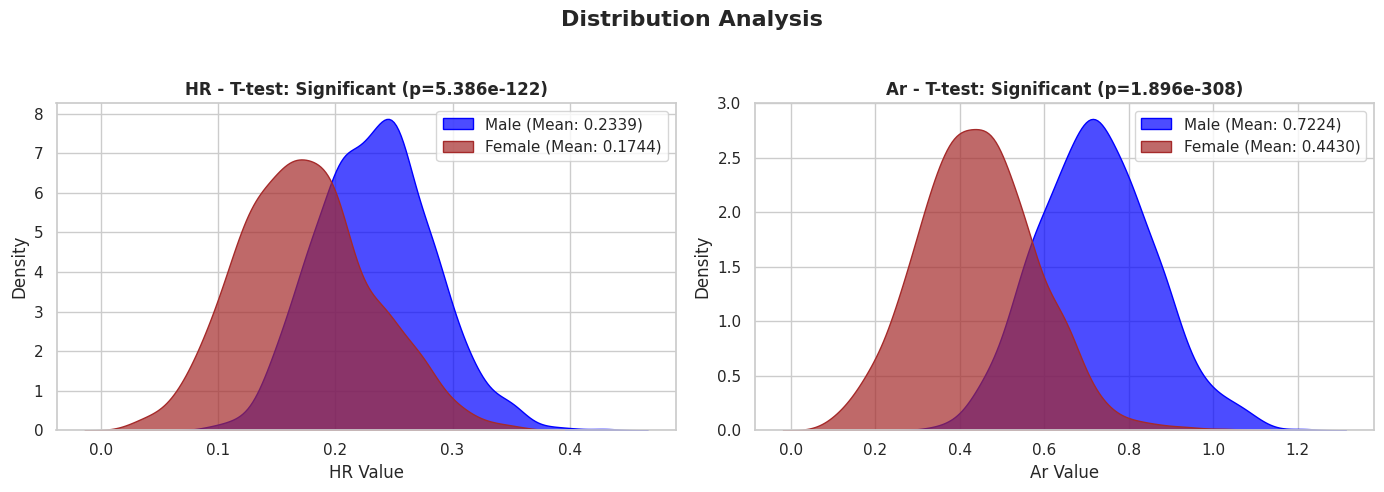

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = results_df.copy()  # Assume 'results_df' is your DataFrame

def bootstrap_means(data, n_bootstrap=1000):
    sample_means = []
    for _ in range(n_bootstrap):
        sample = data.sample(n=len(data), replace=True)
        sample_means.append(sample.mean())
    return np.array(sample_means)

def plot_bootstrap_means_kde(male_data, female_data, variable_names, fig_title):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), dpi=100)  # Adjust figsize to fit your needs
    sns.set(style="whitegrid")  # Set seaborn style for nicer plots

    for ax, data, name in zip(axes, [male_data, female_data], variable_names):
        clean_variable_name = name.replace('_ref', '')  # Remove '_ref' from the variable name

        print(f"Male {clean_variable_name} Mean: {np.mean(data[0]):.4f}")
        print(f"Female {clean_variable_name} Mean: {np.mean(data[1]):.4f}")
        sns.kdeplot(data[0], fill=True, label='Male (Mean: {:.4f})'.format(np.mean(data[0])), color='blue', alpha=0.7, ax=ax)
        sns.kdeplot(data[1], fill=True, label='Female (Mean: {:.4f})'.format(np.mean(data[1])), color='brown', alpha=0.7, ax=ax)
        ax.grid(True)  # Enable grid
        ax.set_title(f'{clean_variable_name} - T-test: {"Significant" if data[2] < 0.05 else "Not Significant"} (p={data[2]:.4g})', fontweight='bold')
        ax.set_xlabel(f'{clean_variable_name} Value')
        ax.set_ylabel('Density')
        ax.legend()

    plt.suptitle(fig_title, fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to fit everything nicely and remove excess white space
    plt.savefig('distribution_analysis.pdf', format='pdf')  # Save the figure as a PDF
    plt.show()

def permutation_test(data1, data2, num_permutations=10000):
    observed_diff = np.mean(data1) - np.mean(data2)
    combined = np.concatenate([data1, data2])
    perm_diffs = []
    for _ in range(num_permutations):
        np.random.shuffle(combined)
        new_data1 = combined[:len(data1)]
        new_data2 = combined[len(data1):]
        perm_diffs.append(np.mean(new_data1) - np.mean(new_data2))
    perm_diffs = np.abs(perm_diffs)
    p_value = np.mean(perm_diffs >= abs(observed_diff))
    return p_value

# Prepare data for plotting
def prepare_and_plot_data():
    variable_names = ['HR_ref', 'Ar_ref']
    results = []
    for variable_name in variable_names:
        male_data = df[df['gender'] == 'Male'][variable_name]
        female_data = df[df['gender'] == 'Female'][variable_name]
        bootstrap_male = bootstrap_means(male_data)
        bootstrap_female = bootstrap_means(female_data)
        p_value = permutation_test(bootstrap_male, bootstrap_female)
        t_stat, t_p_value = stats.ttest_ind(bootstrap_male, bootstrap_female, equal_var=False)
        results.append([bootstrap_male, bootstrap_female, t_p_value])

    plot_bootstrap_means_kde(results[0], results[1], variable_names, "Distribution Analysis")

# Call the function to execute
prepare_and_plot_data()


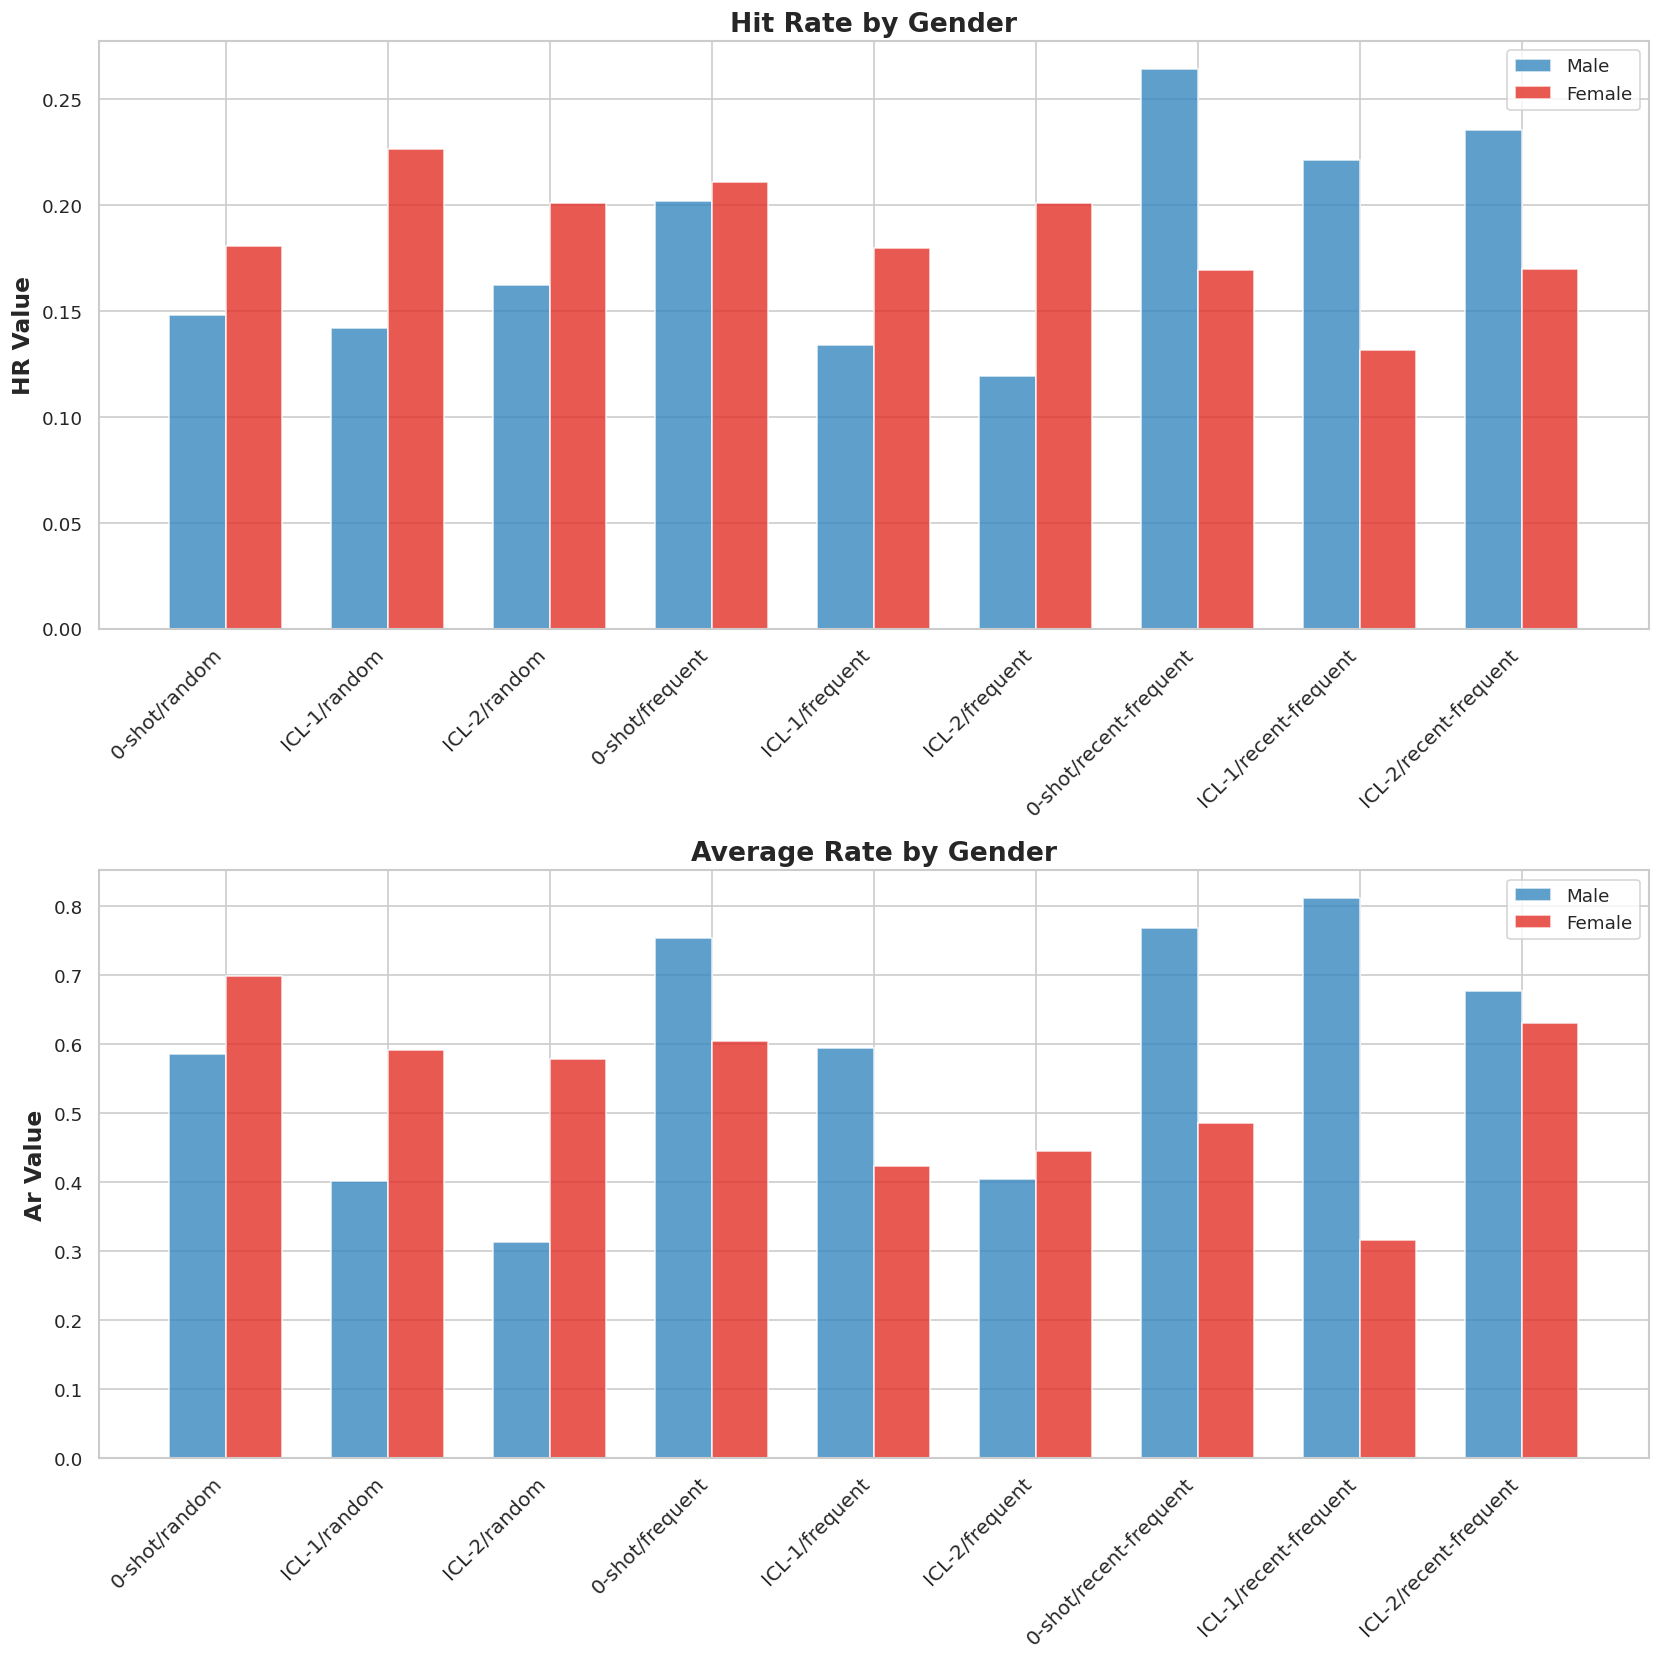

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style
sns.set_style("whitegrid")


HR_Male = [0.1492, 0.1409, 0.1646, 0.2010, 0.1323, 0.1189, 0.2651, 0.2231, 0.2362]
HR_Female = [0.1815, 0.2298, 0.2013, 0.2116, 0.1815, 0.1984, 0.1709, 0.1338, 0.1703]
Ar_Male = [0.5125, 0.6365,  0.5307, 0.5438, 0.5470, 0.3518, 0.9660, 0.7563, 0.7173]
Ar_Female = [0.6716, 0.6287, 0.6546, 0.6015, 0.4182, 0.4967, 0.6420, 0.3043,  0.4450]


# # Data
# HR_Male = [0.1482,  0.1418, 0.1620,  0.2020, 0.1339, 0.1195, 0.2641, 0.2210, 0.2354]
# HR_Female = [0.1804, 0.2262, 0.2011, 0.2109, 0.1797, 0.2007, 0.1694, 0.1315, 0.1697]
# Ar_Male = [0.5854,  0.4022, 0.3134, 0.7545, 0.5942,  0.4049, 0.7683, 0.8114, 0.6774]
# Ar_Female = [0.6985, 0.5908, 0.5780, 0.6046, 0.4235, 0.4453, 0.4857, 0.3157, 0.6311]


bins = ['0-shot/random', 'ICL-1/random', 'ICL-2/random',
        '0-shot/frequent', 'ICL-1/frequent', 'ICL-2/frequent',
        '0-shot/recent-frequent', 'ICL-1/recent-frequent', 'ICL-2/recent-frequent']
x = np.arange(len(bins))  # the label locations

# Set up the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(14, 14), dpi=120)  # High resolution for sharper text

# Bar width
width = 0.35  # the width of the bars

# Color palette
colors_male = sns.color_palette("Blues", n_colors=2)[1]
colors_female = sns.color_palette("Reds", n_colors=2)[1]

# Plot for HR
ax[0].bar(x - width/2, HR_Male, width, label='Male', color=colors_male, alpha=0.8)
ax[0].bar(x + width/2, HR_Female, width, label='Female', color=colors_female, alpha=0.8)
ax[0].set_ylabel('HR Value', fontsize=14, fontweight='bold')
ax[0].set_title('Hit Rate by Gender', fontsize=16, fontweight='bold')
ax[0].set_xticks(x)
ax[0].set_xticklabels(bins, rotation=45, ha='right', fontsize=12)
ax[0].legend()

# Plot for Ar
ax[1].bar(x - width/2, Ar_Male, width, label='Male', color=colors_male, alpha=0.8)
ax[1].bar(x + width/2, Ar_Female, width, label='Female', color=colors_female, alpha=0.8)
ax[1].set_ylabel('Ar Value', fontsize=14, fontweight='bold')
ax[1].set_title('Average Rate by Gender', fontsize=16, fontweight='bold')
ax[1].set_xticks(x)
ax[1].set_xticklabels(bins, rotation=45, ha='right', fontsize=12)
ax[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
# Function to calculate SNSR and SNSV according to the provided definitions
def calculate_snsr_snsv(sim_values):
    # SNSR calculation
    snsr = max(sim_values) - min(sim_values)

    # SNSV calculation
    mean_sim = np.mean(sim_values)
    snsv = np.sqrt(np.mean((sim_values - mean_sim) ** 2))

    return snsr, snsv


# Assuming 'results_df' is the name of the DataFrame provided
df = results_df.copy()


# Normalize the differences to scale them between 0-1
max_diff_hr = df['Diff_HR'].abs().max()
max_diff_ar = df['Diff_AR'].abs().max()

# Normalize the differences to scale them between 0-1 (treating them as similarities for calculation purposes)
df['Sim_HR'] = df['Diff_HR'].abs() / max_diff_hr
df['Sim_AR'] = df['Diff_AR'].abs() / max_diff_ar

# Calculate the normalized differences (DeltaB = 1 - s) for each gender
dHR_male = 1 - df[df['age_group'] == 'Early Adult (≤24 yrs)']['Sim_HR'].mean()
dHR_female = 1 - df[df['age_group'] == 'Mid Adult (>24 yrs)']['Sim_HR'].mean()
dAR_male = 1 - df[df['age_group'] == 'Early Adult (≤24 yrs)']['Sim_AR'].mean()
dAR_female = 1 - df[df['age_group'] == 'Mid Adult (>24 yrs)']['Sim_AR'].mean()

# Calculate e1 and e2 using normalized values
e1 = dHR_male - dHR_female
e2 = dAR_male - dAR_female

# Aggregate the normalized similarities for gender to use in SNSR and SNSV calculations
gender_aggregate_hr = df.groupby('age_group')['Sim_HR'].agg(['max', 'min', 'mean', 'std'])
gender_aggregate_ar = df.groupby('age_group')['Sim_AR'].agg(['max', 'min', 'mean', 'std'])

# Calculate SNSR for HR and AR (range of similarities across genders)
snsr_hr = gender_aggregate_hr['max'].max() - gender_aggregate_hr['min'].min()
snsr_ar = gender_aggregate_ar['max'].max() - gender_aggregate_ar['min'].min()

# Calculate SNSV for HR and AR (standard deviation of similarities across genders)
snsv_hr = np.sqrt(np.mean((df['Sim_HR'] - gender_aggregate_hr['mean'].mean()) ** 2))
snsv_ar = np.sqrt(np.mean((df['Sim_AR'] - gender_aggregate_ar['mean'].mean()) ** 2))

# Print the requested values
(dHR_male, dHR_female, e1, snsr_hr, snsv_hr, dAR_male, dAR_female, e2, snsr_ar, snsv_ar)

# Print the requested values
print(f"dHR_male: {dHR_male}, dHR_female: {dHR_female}, e1: {e1}, SNSR (HR): {snsr_hr}, SNSV (HR): {snsv_hr}")
print(f"dAR_male: {dAR_male}, dAR_female: {dAR_female}, e2: {e2}, SNSR (AR): {snsr_ar}, SNSV (AR): {snsv_ar}")

dHR_male: 0.863013698630137, dHR_female: 0.9285714285714286, e1: -0.06555772994129161, SNSR (HR): 1.0, SNSV (HR): 0.26646714196332416
dAR_male: 0.8721461187214612, dAR_female: 0.8095238095238095, e2: 0.06262230919765166, SNSR (AR): 1.0, SNSV (AR): 0.26135448292541724


In [ ]:

# import pandas as pd
# import ast

# # Combine actual male and female lists to create the reference lists
# ref_hr_list = actual_hr['Male'] + actual_hr['Female']
# ref_ar_list = actual_ar['Male'] + actual_ar['Female']

# # Combine actual and counterfactual data to create the "all Male" and "all Female" groups
# all_male_hr = actual_hr['Male'] + counterfactual_hr['Male']
# all_female_hr = actual_hr['Female'] + counterfactual_hr['Female']
# all_male_ar = actual_ar['Male'] + counterfactual_ar['Male']
# all_female_ar = actual_ar['Female'] + counterfactual_ar['Female']

# # Compute differences for the HR lists
# cf_male_hr_diff = [m - r for m, r in zip(all_male_hr, ref_hr_list)]
# cf_female_hr_diff = [f - r for f, r in zip(all_female_hr, ref_hr_list)]

# # Similarly, for the AR lists, if they are also aligned
# cf_male_ar_diff = [m - r for m, r in zip(all_male_ar, ref_ar_list)]
# cf_female_ar_diff = [f - r for f, r in zip(all_female_ar, ref_ar_list)]


# data = {
#     'cf_male_hr_diff': cf_male_hr_diff,  # Simulated HR differences for males
#     'cf_female_hr_diff': cf_female_hr_diff,  # Simulated HR differences for females
#     'cf_male_ar_diff': cf_male_ar_diff,  # Simulated AR differences for males
#     'cf_female_ar_diff': cf_female_ar_diff  # Simulated AR differences for females
# }


# # Function to calculate SNSR and SNSV
# def calculate_snsr_snsv(sim_values):
#     snsr = max(sim_values) - min(sim_values)
#     mean_sim = np.mean(sim_values)
#     snsv = np.sqrt(np.mean((sim_values - mean_sim) ** 2))
#     return snsr, snsv

# # Normalize the differences to scale them between 0-1 (treating them as similarities)
# df['norm_cf_male_hr_diff'] = 1 - (abs(df['cf_male_hr_diff']) / max(abs(df['cf_male_hr_diff']).max(), 0.01))
# df['norm_cf_female_hr_diff'] = 1 - (abs(df['cf_female_hr_diff']) / max(abs(df['cf_female_hr_diff']).max(), 0.01))
# df['norm_cf_male_ar_diff'] = 1 - (abs(df['cf_male_ar_diff']) / max(abs(df['cf_male_ar_diff']).max(), 0.01))
# df['norm_cf_female_ar_diff'] = 1 - (abs(df['cf_female_ar_diff']) / max(abs(df['cf_female_ar_diff']).max(), 0.01))

# # Calculate SNSR and SNSV for HR and AR
# snsr_hr = calculate_snsr_snsv(df['norm_cf_male_hr_diff'].tolist() + df['norm_cf_female_hr_diff'].tolist())
# snsr_ar = calculate_snsr_snsv(df['norm_cf_male_ar_diff'].tolist() + df['norm_cf_female_ar_diff'].tolist())
# snsv_hr = calculate_snsr_snsv(df['norm_cf_male_hr_diff'].tolist() + df['norm_cf_female_hr_diff'].tolist())
# snsv_ar = calculate_snsr_snsv(df['norm_cf_male_ar_diff'].tolist() + df['norm_cf_female_ar_diff'].tolist())

# # Print the SNSR and SNSV values for HR and AR
# print(f"HR SNSR: {snsr_hr[0]}, HR SNSV: {snsr_hr[1]}")
# print(f"AR SNSR: {snsr_ar[0]}, AR SNSV: {snsr_ar[1]}")

In [ ]:
def jaccard_similarity(neutral, sensitive, k):
    """
    Calculate the Jaccard similarity between two recommendation lists up to the top k items.

    :param neutral: List of recommendations from the neutral recommender.
    :param sensitive: List of recommendations from the sensitive recommender.
    :param k: Top k items to consider.
    :return: The Jaccard similarity score.
    """
    #Adjust the lists to consider only the top k items, where k is the minimum of top_k or list length
    neutral_top_k = neutral[:min(k, len(neutral))]
    sensitive_top_k = sensitive[:min(k, len(sensitive))]

    # Convert the lists to sets for the top k items
    neutral_set = set(neutral_top_k[:k])
    sensitive_set = set(sensitive_top_k[:k])

    # Calculate the intersection and union
    intersection = neutral_set.intersection(sensitive_set)
    union = neutral_set.union(sensitive_set)

    # Calculate the Jaccard similarity
    jaccard_score = len(intersection) / len(union) if union else 0
    return jaccard_score


def calc_prag(neutral, sensitive, top_k):
    concordant_pairs = 0
    discordant_pairs = 0
    for i in range(min(top_k, len(neutral))):  # Iterate up to min(top_k, length of neutral)
      for j in range(i+1, min(top_k, len(neutral))):  # Iterate from i+1 to min(top_k, length of neutral)
            if neutral[i] in sensitive and neutral[j] in sensitive:
                neutral_order = i < j
                sensitive_order = sensitive.index(neutral[i]) < sensitive.index(neutral[j])
                if neutral_order == sensitive_order:
                    concordant_pairs += 1
                else:
                    discordant_pairs += 1

    total_pairs = concordant_pairs + discordant_pairs
    return concordant_pairs / total_pairs if total_pairs > 0 else 0

def calc_prag2(neutral, sensitive, k):
    #Adjust the lists to consider only the top k items, where k is the minimum of top_k or list length
    neutral_top_k = neutral[:min(k, len(neutral))]
    sensitive_top_k = sensitive[:min(k, len(sensitive))]


    concordant_pairs = 0
    discordant_pairs = 0

    # Find common items in both lists
    common_items = set(neutral_top_k).intersection(sensitive_top_k)

    # Create a list of indices for common items in both lists
    neutral_indices = [neutral.index(item) for item in common_items]
    sensitive_indices = [sensitive.index(item) for item in common_items]

    # Calculate concordant and discordant pairs
    for i in range(len(common_items)):
        for j in range(i+1, len(common_items)):
            neutral_order = neutral_indices[i] < neutral_indices[j]
            sensitive_order = sensitive_indices[i] < sensitive_indices[j]
            if neutral_order == sensitive_order:
                concordant_pairs += 1
            else:
                discordant_pairs += 1

    total_pairs = concordant_pairs + discordant_pairs
    return concordant_pairs / total_pairs if total_pairs > 0 else 0

def filter_recommendations(recommendations, ground_truth):
    """
    Filter the recommendations based on the ground truth.

    :param recommendations: List of recommendations to filter.
    :param ground_truth: Ground truth list of items.
    :return: Filtered recommendations that are present in the ground truth.
    """
    return [item for item in recommendations if item in ground_truth]

# Example usage:
ground_truth = ['Song2', 'Song3', 'Song4', 'Song5']
neutral_list = ['Song1', 'Song2', 'Song3', 'Song4', 'Song5']
sensitive_list = ['Song5', 'Song2', 'Song3', 'Song50', 'Song4']

# Filter recommendations based on ground truth
filtered_neutral_list = filter_recommendations(neutral_list, ground_truth)
filtered_sensitive_list = filter_recommendations(sensitive_list, ground_truth)

print(ground_truth)
print(neutral_list)
print(sensitive_list)
print(filtered_neutral_list)
print(filtered_sensitive_list)

# Calculate PRAG scores
prag_score = calc_prag(filtered_neutral_list, filtered_sensitive_list, top_k)
print(f"PRAG Score: {prag_score}")

prag_score = calc_prag2(filtered_neutral_list, filtered_sensitive_list, top_k)
print(f"PRAG Score: {prag_score}")

# Calculate Jaccard similarity
jaccard_score = jaccard_similarity(filtered_neutral_list, filtered_sensitive_list, top_k)
print(f"Jaccard Similarity Score: {jaccard_score}")

['Song2', 'Song3', 'Song4', 'Song5']
['Song1', 'Song2', 'Song3', 'Song4', 'Song5']
['Song5', 'Song2', 'Song3', 'Song50', 'Song4']
['Song2', 'Song3', 'Song4', 'Song5']
['Song5', 'Song2', 'Song3', 'Song4']
PRAG Score: 1.0
PRAG Score: 1.0
Jaccard Similarity Score: 0.5


In [ ]:
# # Extract data for the first user
# user_data = new_df2.iloc[2]
# print(user_data)
# # Extract ground truth, neutral list, and sensitive list
# ground_truth = user_data['itemIds']
# neutral_list = user_data['recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-zero-shot_itemIds']
# sensitive_list = user_data['recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-zero-shot_itemIds']

# print(f'ground_truth = {ground_truth}')
# print(f'neutral_list = {neutral_list}')
# print(f'sensitive_list = {sensitive_list}')

# # Convert ground truth to list of strings
# ground_truth = [str(item_id) for item_id in ground_truth]
# neutral_list = [str(item_id) for item_id in neutral_list]
# sensitive_list = [str(item_id) for item_id in sensitive_list]

# # Filter recommendations based on ground truth
# filtered_neutral_list = filter_recommendations(neutral_list, ground_truth)
# filtered_sensitive_list = filter_recommendations(sensitive_list, ground_truth)

# # Define top k
# top_k = len(ground_truth)  # Assuming top k is the length of the ground truth

# # Calculate PRAG scores
# prag_score = calc_prag(filtered_neutral_list, filtered_sensitive_list, top_k)
# prag_score2 = calc_prag2(filtered_neutral_list, filtered_sensitive_list, top_k)

# # Calculate Jaccard Similarity
# jaccard_score = jaccard_similarity(filtered_neutral_list, filtered_sensitive_list, top_k)

# print(f"PRAG Score: {prag_score}")
# print(f"PRAG2 Score: {prag_score2}")
# print(f"Jaccard Similarity Score: {jaccard_score}")


In [ ]:
import pandas as pd


ICL_options = ['zero-shot', 'ICL-Few-shot-1', 'ICL-Few-shot-2']
sampling_strategy_list = ['random', 'frequent','recent-frequent']
user_infos_list = ['gender', 'age-group', 'intersectional']
counterfactual_list = ['False', 'True']
# Initialize an empty dataframe to store results
results_df = pd.DataFrame(columns=['userId', 'gender', 'age_group', 'itemIds', 'artistIds' , 'PRAG_score', 'PRAG2_score', 'Jaccard_similarity'])

for user_infos in user_infos_list:
  for counterfactual in counterfactual_list:
    for sampling_strategy in sampling_strategy_list:
      for ICL_option in ICL_options:
        for index, user_data in new_df2.iterrows():
            # Extract ground truth, neutral list, and sensitive list
            ground_truth = user_data['itemIds']
            neutral_list = user_data[f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_strategy}_userDemo-no_info_interact-{ICL_option}_itemIds']
            sensitive_list = user_data[f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_strategy}_userDemo-{user_infos}_interact-{ICL_option}_itemIds']
            cntsensitive_list = user_data[f'recommendation_for_prompt_counterfact-True_sample-{sampling_strategy}_userDemo-{user_infos}_interact-{ICL_option}_itemIds']

            # print(f'ground_truth = {ground_truth}')
            # print(f'neutral_list = {neutral_list}')
            # print(f'sensitive_list = {sensitive_list}')

            # Convert ground truth, neutral list, and sensitive list to list of strings
            ground_truth = [str(item_id) for item_id in ground_truth]
            neutral_list = [str(item_id) for item_id in neutral_list]
            sensitive_list = [str(item_id) for item_id in sensitive_list]
            cnt_sensitive_list = [str(item_id) for item_id in cntsensitive_list]

            # Filter recommendations based on ground truth
            filtered_neutral_list = filter_recommendations(neutral_list, ground_truth)
            filtered_sensitive_list = filter_recommendations(sensitive_list, ground_truth)
            cnt_sensitive_list = filter_recommendations(cnt_sensitive_list, ground_truth)

            # Define top k
            top_k = 3  # Assuming top k is the length of the ground truth

            # Calculate PRAG scores
            prag_score = calc_prag(filtered_neutral_list, filtered_sensitive_list, top_k)
            prag_score2 = calc_prag2(filtered_neutral_list, filtered_sensitive_list, top_k)

            # Calculate Jaccard Similarity
            jaccard_score = jaccard_similarity(filtered_neutral_list, filtered_sensitive_list, top_k)

            # Append results to the results dataframe
            results_df.loc[len(results_df)] = [user_data['userId'], user_data['gender'], user_data['age_group'], user_data['itemIds'], user_data['artistIds'], prag_score, prag_score2, jaccard_score]

        # Display the results dataframe
        # print(results_df)

        # Compute the average of each metric over users
        average_PRAG_score = results_df['PRAG_score'].mean()
        average_PRAG2_score = results_df['PRAG2_score'].mean()
        average_Jaccard_similarity = results_df['Jaccard_similarity'].mean()


Average PRAG Score: 0.0
Average PRAG2 Score: 0.0
Average Jaccard Similarity Score: 0.0
Average PRAG Score: 0.0
Average PRAG2 Score: 0.0
Average Jaccard Similarity Score: 0.0
Average PRAG Score: 0.0
Average PRAG2 Score: 0.0
Average Jaccard Similarity Score: 0.0
Average PRAG Score: 0.0
Average PRAG2 Score: 0.0
Average Jaccard Similarity Score: 0.0
Average PRAG Score: 0.0
Average PRAG2 Score: 0.0
Average Jaccard Similarity Score: 0.0
Average PRAG Score: 0.0
Average PRAG2 Score: 0.0
Average Jaccard Similarity Score: 0.0
Average PRAG Score: 0.0
Average PRAG2 Score: 0.0
Average Jaccard Similarity Score: 0.0
Average PRAG Score: 0.0
Average PRAG2 Score: 0.0
Average Jaccard Similarity Score: 0.0
Average PRAG Score: 0.0
Average PRAG2 Score: 0.0
Average Jaccard Similarity Score: 0.0
Average PRAG Score: 0.0
Average PRAG2 Score: 0.0
Average Jaccard Similarity Score: 0.0
Average PRAG Score: 0.0
Average PRAG2 Score: 0.0
Average Jaccard Similarity Score: 0.0
Average PRAG Score: 0.0
Average PRAG2 Score

In [ ]:
def hit_rate(recommendations, ground_truth):
    """
    Calculate the hit rate.

    :param recommendations: List of recommended items.
    :param ground_truth: List of items in the ground truth.
    :return: The hit rate.
    """
    hits = sum(1 for item in recommendations if item in ground_truth)
    hit_rate = hits / len(recommendations) if recommendations else 0
    return hit_rate

def average_rank(recommendations, ground_truth):
    """
    Calculate the average rank of the recommended items in the ground truth.

    :param recommendations: List of recommended items.
    :param ground_truth: List of items in the ground truth.
    :return: The average rank.
    """
    ranks = [recommendations.index(item) + 1 for item in ground_truth if item in recommendations]
    average_rank = sum(ranks) / len(ranks) if ranks else 0
    return average_rank

# Extract data for the first user
#

user_data = new_df2.iloc[2]

# Example usage:
# ground_truth = ['Song2', 'Song3', 'Song4', 'Song5']
# neutral_list = ['Song1', 'Song2', 'Song3', 'Song4', 'Song5']
# sensitive_list = ['Song5', 'Song2', 'Song3', 'Song50', 'Song4']


# # Extract ground truth, neutral list, and sensitive list
ground_truth = user_data['itemIds']
neutral_list = user_data['recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-zero-shot_itemIds']
sensitive_list = user_data['recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-zero-shot_itemIds']
cnt_sensitive_list = user_data['recommendation_for_prompt_counterfact-True_sample-random_userDemo-gender_interact-zero-shot_itemIds']

# print(f'ground_truth = {ground_truth}')
# print(f'neutral_list = {neutral_list}')
# print(f'sensitive_list = {sensitive_list}')

# Convert ground truth to list of strings
ground_truth = [str(item_id) for item_id in ground_truth]
neutral_list = [str(item_id) for item_id in neutral_list]
sensitive_list = [str(item_id) for item_id in sensitive_list]
cnt_sensitive_list = [str(item_id) for item_id in cnt_sensitive_list]


# Calculate Hit Rate
hit_rate_score = hit_rate(sensitive_list, ground_truth)

# Calculate Average Rank
average_rank_score = average_rank(sensitive_list, ground_truth)

print(f"Hit Rate: {hit_rate_score}")
print(f"Average Rank: {average_rank_score}")

Hit Rate: 0.0
Average Rank: 0


In [ ]:
new_df2

,userId,gender,age_group,itemIds,artistIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-ICL-Few-shot-1_itemIds,...,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-no_info_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-gender_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-gender_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-gender_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-age-group_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-age-group_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-age-group_interact-ICL-Few-shot-2_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-intersectional_interact-zero-shot_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-intersectional_interact-ICL-Few-shot-1_itemIds,recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-intersectional_interact-ICL-Few-shot-2_itemIds
0,6,Female,Early Adult (≤24 yrs),"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[813, 8857, 6855, 7218, 2643, 7105, 7728, 4990...","[21572, 4611, 153]","[180, 21572, 4611]","[13, 13, 1322]","[21572, 4611, 153]","[180, 21572, 4611]",...,"[13, 7782]","[133, 98, 133]","[98, 133, 133]","[1322, 13, 7782]","[133, 98, 133]","[98, 133, 133]","[1322, 13, 7782]","[133, 98, 133]","[98, 133, 133]","[1322, 13, 7782]"
1,46,Female,Early Adult (≤24 yrs),"[13, 74, 77, 155, 195, 203, 204, 217, 341, 345...","[4990, 2187, 6752, 4270, 2247, 2599, 3399, 502...","[1323, 1561, 1601]","[1323, 1601, 642]","[1323, 1601, 1323]","[1601, 1323, 642]","[1601, 1323, 137]",...,"[1323, 642, 5715]","[1688, 1688, 1688]","[1688, 1688, 1688]","[1323, 642, 5715]",[1688],"[1688, 1688, 1688]","[1323, 642, 5715]","[1688, 1688, 1688]","[1688, 1688, 1688]","[1323, 642, 5715]"
2,48,Male,Early Adult (≤24 yrs),"[357, 1706, 1707, 1708, 1709, 1710, 1711, 1712...","[5237, 7143, 23731, 9565, 22461, 224, 18603, 3...","[1885, 1888, 1896]","[1896, 1896, 1896]","[1896, 1888, 1885]","[1896, 1888, 1885]","[1896, 1888, 1885]",...,"[1955, 1725]","[1888, 1957, 1955]",[1888],"[1955, 1725]","[1888, 1957, 1955]",[1888],"[1844, 1955, 1725]","[1888, 1957, 1955]",[1888],"[1955, 1725]"
3,57,Female,Early Adult (≤24 yrs),"[654, 787, 790, 792, 798, 891, 938, 1340, 1768...","[2133, 4465, 4286, 3366, 2157, 1506, 4176, 222...","[45, 1913, 1839]","[657, 2768]","[2768, 657, 9460]","[1913, 17127, 1672]","[657, 2768, 9460]",...,"[1913, 1768, 657]","[1913, 1768, 2768]","[1913, 1768, 1801]","[1913, 1768, 657]","[1913, 1768, 2768]","[1913, 1801]","[1913, 1768, 657]","[1913, 1768, 657]","[1913, 1768, 1801]","[657, 1768, 1913]"
4,65,Female,Early Adult (≤24 yrs),"[3050, 3051, 3052, 3053, 3054, 3055, 3056, 305...","[30582, 16460, 27249, 9635, 16458, 30841, 2797...","[3058, 3228, 3036]","[3058, 3058, 3058]","[3058, 3058, 3058]","[3058, 3228, 3036]","[3058, 3058, 3058]",...,"[3058, 3058, 3469]","[3058, 3058, 3469]","[3058, 3058, 3469]","[3058, 3058, 3469]","[3058, 3058, 3469]","[3058, 3058, 3469]","[3058, 3058, 3469]","[3058, 3058, 3469]","[3058, 3058, 3058]","[3058, 3058, 3469]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,939,Male,Early Adult (≤24 yrs),"[581, 640,

In [ ]:
results_df

,userId,gender,age_group,itemIds,artistIds,PRAG_score,PRAG2_score,Jaccard_similarity
0,6,Female,Early Adult (≤24 yrs),"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[813, 8857, 6855, 7218, 2643, 7105, 7728, 4990...",0,0,0.0
1,46,Female,Early Adult (≤24 yrs),"[13, 74, 77, 155, 195, 203, 204, 217, 341, 345...","[4990, 2187, 6752, 4270, 2247, 2599, 3399, 502...",0,0,0.0
2,48,Male,Early Adult (≤24 yrs),"[357, 1706, 1707, 1708, 1709, 1710, 1711, 1712...","[5237, 7143, 23731, 9565, 22461, 224, 18603, 3...",0,0,0.0
3,57,Female,Early Adult (≤24 yrs),"[654, 787, 790, 792, 798, 891, 938, 1340, 1768...","[2133, 4465, 4286, 3366, 2157, 1506, 4176, 222...",0,0,0.0
4,65,Female,Early Adult (≤24 yrs),"[3050, 3051, 3052, 3053, 3054, 3055, 3056, 305...","[30582, 16460, 27249, 9635, 16458, 30841, 2797...",0,0,0.0
...,...,...,...,...,...,...,...,...
4315,939,Male,Early Adult (≤24 yrs),"[581, 640, 815, 818, 819, 820, 1535, 1789, 179...","[1109, 1972, 3214, 2879, 2157, 1904, 3307, 296...",0,0,0.0
4316,957,Male,Early Adult (≤24 yrs),"[617, 679, 1354, 1355, 1356, 1357, 1397, 1434,...","[1697, 2852, 2241, 2625, 4182, 2927, 3307, 467...",0,0,0.0
4317,971,Female,Early Adult (≤24 yrs),"[171, 462, 593, 631, 818, 1178, 1179, 1337, 14...","[1983, 4397, 3222, 2208, 1109, 122, 4286, 578,...",0,0,0.0
4318,980,Female,Early Adult (≤24 yrs),"[297, 506, 507, 564, 568, 572, 593, 643, 646, ...","[3828, 4542, 1721, 2413, 3222, 2133, 3419, 255...",0,0,0.0


In [ ]:
cf_male_hr_diff

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 -0.33333333333333337,
 -0.3333333333333333,
 -0.6666666666666666,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.0,
 -0.16666666666666669,
 0.0,
 0.16666666666666669,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.6666666666666666,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333]

In [ ]:
results_df

,userId,gender,age_group,itemIds,artistIds,HR_sen,HR_ref,Diff_HR,AR_sen,Ar_ref,Diff_AR
0,6,Female,Early Adult (≤24 yrs),"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[813, 8857, 6855, 7218, 2643, 7105, 7728, 4990...",1.000000,1.0,0.000000,2.0,2.0,0.5
1,46,Female,Early Adult (≤24 yrs),"[13, 74, 77, 155, 195, 203, 204, 217, 341, 345...","[4990, 2187, 6752, 4270, 2247, 2599, 3399, 502...",0.500000,1.0,-0.500000,1.0,1.0,0.0
2,48,Male,Early Adult (≤24 yrs),"[357, 1706, 1707, 1708, 1709, 1710, 1711, 1712...","[5237, 7143, 23731, 9565, 22461, 224, 18603, 3...",1.000000,1.0,0.000000,1.5,1.5,0.0
3,57,Female,Early Adult (≤24 yrs),"[654, 787, 790, 792, 798, 891, 938, 1340, 1768...","[2133, 4465, 4286, 3366, 2157, 1506, 4176, 222...",0.666667,1.0,-0.333333,1.5,1.5,-0.5
4,65,Female,Early Adult (≤24 yrs),"[3050, 3051, 3052, 3053, 3054, 3055, 3056, 305...","[30582, 16460, 27249, 9635, 16458, 30841, 2797...",1.000000,1.0,0.000000,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
75,939,Male,Early Adult (≤24 yrs),"[581, 640, 815, 818, 819, 820, 1535, 1789, 179...","[1109, 1972, 3214, 2879, 2157, 1904, 3307, 296...",0.000000,0.0,0.000000,0.0,0.0,0.0
76,957,Male,Early Adult (≤24 yrs),"[617, 679, 1354, 1355, 1356, 1357, 1397, 1434,...","[1697, 2852, 2241, 2625, 4182, 2927, 3307, 467...",0.000000,0.0,0.000000,0.0,0.0,0.0
77,971,Female,Early Adult (≤24 yrs),"[171, 462, 593, 631, 818, 1178, 1179, 1337, 14...","[1983, 4397, 3222, 2208, 1109, 122, 4286, 578,...",0.000000,0.0,0.000000,0.0,0.0,0.0
78,980,Female,Early Adult (≤24 yrs),"[297, 506, 507, 564, 568, 572, 593, 643, 646, ...","[3828, 4542, 1721, 2413, 3222, 2133, 3419, 255...",0.000000,0.0,0.000000,0.0,0.0,0.0


In [ ]:
import numpy as np
# Function to calculate SNSR and SNSV according to the provided definitions
def calculate_snsr_snsv(sim_values):
    # SNSR calculation
    snsr = max(sim_values) - min(sim_values)

    # SNSV calculation
    mean_sim = np.mean(sim_values)
    snsv = np.sqrt(np.mean((sim_values - mean_sim) ** 2))

    return snsr, snsv


# Assuming 'results_df' is the name of the DataFrame provided
df = results_df.copy()


# Normalize the differences to scale them between 0-1
max_diff_hr = df['Diff_HR'].abs().max()
max_diff_ar = df['Diff_AR'].abs().max()

# Normalize the differences to scale them between 0-1 (treating them as similarities for calculation purposes)
df['Sim_HR'] = df['Diff_HR'].abs() / max_diff_hr
df['Sim_AR'] = df['Diff_AR'].abs() / max_diff_ar

# Calculate the normalized differences (DeltaB = 1 - s) for each gender
dHR_male = 1 - df[df['gender'] == 'Male']['Sim_HR'].mean()
dHR_female = 1 - df[df['gender'] == 'Female']['Sim_HR'].mean()
dAR_male = 1 - df[df['gender'] == 'Male']['Sim_AR'].mean()
dAR_female = 1 - df[df['gender'] == 'Female']['Sim_AR'].mean()

# Calculate e1 and e2 using normalized values
e1 = dHR_male - dHR_female
e2 = dAR_male - dAR_female

# Aggregate the normalized similarities for gender to use in SNSR and SNSV calculations
gender_aggregate_hr = df.groupby('gender')['Sim_HR'].agg(['max', 'min', 'mean', 'std'])
gender_aggregate_ar = df.groupby('gender')['Sim_AR'].agg(['max', 'min', 'mean', 'std'])

# Calculate SNSR for HR and AR (range of similarities across genders)
snsr_hr = gender_aggregate_hr['max'].max() - gender_aggregate_hr['min'].min()
snsr_ar = gender_aggregate_ar['max'].max() - gender_aggregate_ar['min'].min()

# Calculate SNSV for HR and AR (standard deviation of similarities across genders)
snsv_hr = np.sqrt(np.mean((df['Sim_HR'] - gender_aggregate_hr['mean'].mean()) ** 2))
snsv_ar = np.sqrt(np.mean((df['Sim_AR'] - gender_aggregate_ar['mean'].mean()) ** 2))

# Print the requested values
(dHR_male, dHR_female, e1, snsr_hr, snsv_hr, dAR_male, dAR_female, e2, snsr_ar, snsv_ar)

# Print the requested values
print(f"dHR_male: {dHR_male}, dHR_female: {dHR_female}, e1: {e1}, SNSR (HR): {snsr_hr}, SNSV (HR): {snsv_hr}")
print(f"dAR_male: {dAR_male}, dAR_female: {dAR_female}, e2: {e2}, SNSR (AR): {snsr_ar}, SNSV (AR): {snsv_ar}")

dHR_male: 0.8722222222222222, dHR_female: 0.8642857142857143, e1: 0.007936507936507908, SNSR (HR): 1.0, SNSV (HR): 0.2650913757556062
dAR_male: 0.8888888888888888, dAR_female: 0.8380952380952381, e2: 0.050793650793650724, SNSR (AR): 1.0, SNSV (AR): 0.26007477557212055


In [ ]:
# Assuming Sim(a) is represented by HR_sen and AR_sen for each gender

df = results_df.copy()
# Function to calculate SNSR and SNSV according to the provided definitions
def calculate_snsr_snsv(sim_values):
    # SNSR calculation
    snsr = max(sim_values) - min(sim_values)

    # SNSV calculation
    mean_sim = np.mean(sim_values)
    snsv = np.sqrt(np.mean((sim_values - mean_sim) ** 2))

    return snsr, snsv

# Group by gender and calculate Sim(a) for HR_sen and AR_sen
sim_hr = df.groupby('gender')['HR_sen'].mean()
sim_ar = df.groupby('gender')['AR_sen'].mean()

# Calculate SNSR and SNSV for HR_sen and AR_sen
snsr_hr, snsv_hr = calculate_snsr_snsv(sim_hr.values)
snsr_ar, snsv_ar = calculate_snsr_snsv(sim_ar.values)

# Calculate differences in hit rates (HR) and acceptance rates (AR) for males and females
dHR_male_raw = df[df['gender'] == 'Male']['HR_sen'].mean() - df[df['gender'] == 'Male']['HR_ref'].mean()
dHR_female_raw = df[df['gender'] == 'Female']['HR_sen'].mean() - df[df['gender'] == 'Female']['HR_ref'].mean()

dAR_male_raw = df[df['gender'] == 'Male']['AR_sen'].mean() - df[df['gender'] == 'Male']['Ar_ref'].mean()
dAR_female_raw = df[df['gender'] == 'Female']['AR_sen'].mean() - df[df['gender'] == 'Female']['Ar_ref'].mean()

# Normalize the values using DeltaB = 1 - s
dHR_male = 1 - dHR_male_raw
dHR_female = 1 - dHR_female_raw
dAR_male = 1 - dAR_male_raw
dAR_female = 1 - dAR_female_raw

# Calculate e1 and e2 using normalized values
e1 = dHR_male - dHR_female
e2 = dAR_male - dAR_female

# Group by gender and calculate means for HR_sen and AR_sen
gender_hr_means = df.groupby('gender')['HR_sen'].mean()
gender_ar_means = df.groupby('gender')['AR_sen'].mean()

# Calculate SNSR and SNSV for HR_sen and AR_sen using normalized values
snsr_hr, snsv_hr = calculate_snsr_snsv(gender_hr_means.values)
snsr_ar, snsv_ar = calculate_snsr_snsv(gender_ar_means.values)

(dHR_male, dHR_female, e1, snsr_hr, snsv_hr, dAR_male, dAR_female, e2, snsr_ar, snsv_ar)


(1.011111111111111,
 1.0142857142857142,
 -0.0031746031746031633,
 0.020634920634920617,
 0.010317460317460309,
 1.0,
 1.0,
 0.0,
 0.11111111111111105,
 0.055555555555555525)

In [ ]:
dAR_male_raw

0.0

In [ ]:
sim_ar

gender
Female    0.700000
Male      0.588889
Name: AR_sen, dtype: float64

In [ ]:
df =results_df.copy()
df

,userId,gender,age_group,itemIds,artistIds,HR_sen,HR_ref,Diff_HR,AR_sen,Ar_ref,Diff_AR
0,6,Female,Early Adult (≤24 yrs),"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[813, 8857, 6855, 7218, 2643, 7105, 7728, 4990...",1.000000,0.666667,0.333333,1.5,1.5,-0.5
1,46,Female,Early Adult (≤24 yrs),"[13, 74, 77, 155, 195, 203, 204, 217, 341, 345...","[4990, 2187, 6752, 4270, 2247, 2599, 3399, 502...",1.000000,1.000000,0.000000,1.0,1.0,0.0
2,48,Male,Early Adult (≤24 yrs),"[357, 1706, 1707, 1708, 1709, 1710, 1711, 1712...","[5237, 7143, 23731, 9565, 22461, 224, 18603, 3...",1.000000,1.000000,0.000000,2.0,2.0,0.0
3,57,Female,Early Adult (≤24 yrs),"[654, 787, 790, 792, 798, 891, 938, 1340, 1768...","[2133, 4465, 4286, 3366, 2157, 1506, 4176, 222...",1.000000,0.666667,0.333333,1.5,1.5,0.0
4,65,Female,Early Adult (≤24 yrs),"[3050, 3051, 3052, 3053, 3054, 3055, 3056, 305...","[30582, 16460, 27249, 9635, 16458, 30841, 2797...",1.000000,1.000000,0.000000,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
75,939,Male,Early Adult (≤24 yrs),"[581, 640, 815, 818, 819, 820, 1535, 1789, 179...","[1109, 1972, 3214, 2879, 2157, 1904, 3307, 296...",0.000000,0.000000,0.000000,0.0,0.0,0.0
76,957,Male,Early Adult (≤24 yrs),"[617, 679, 1354, 1355, 1356, 1357, 1397, 1434,...","[1697, 2852, 2241, 2625, 4182, 2927, 3307, 467...",0.666667,0.000000,0.666667,2.0,2.0,2.0
77,971,Female,Early Adult (≤24 yrs),"[171, 462, 593, 631, 818, 1178, 1179, 1337, 14...","[1983, 4397, 3222, 2208, 1109, 122, 4286, 578,...",0.333333,0.666667,-0.333333,2.0,2.0,1.0
78,980,Female,Early Adult (≤24 yrs),"[297, 506, 507, 564, 568, 572, 593, 643, 646, ...","[3828, 4542, 1721, 2413, 3222, 2133, 3419, 255...",0.000000,0.000000,0.000000,0.0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np

# Benefit deviations
df['B_gender'] = 1 - df['Diff_HR']  # Simplified example
df['B_age'] = 1 - df['Diff_AR']    # Simplified example

# Calculating SNSR and SNSV for gender and age
def calculate_snsr_snsv(column):
    max_b = df[column].max()
    min_b = df[column].min()
    mean_b = df[column].mean()
    snsr = max_b - min_b
    snsv = np.sqrt(((df[column] - mean_b) ** 2).mean())
    return snsr, snsv

snsr_gender, snsv_gender = calculate_snsr_snsv('B_gender')
snsr_age, snsv_age = calculate_snsr_snsv('B_age')

# Adjusting None to match DataFrame length
none_placeholder = [None] * len(df)

# Display results in the specified format
results = {
    'Delta B_NSD_a1': none_placeholder,
    'Delta B_NSD_a2': none_placeholder,
    'Delta B_gender': df['B_gender'].tolist(),
    'SSND': [snsv_gender] * len(df),
    'SSNR': [snsr_gender] * len(df),
    'Delta B_NSD_b1': none_placeholder,
    'Delta B_NSD_b2': none_placeholder,
    'Delta B_age': df['B_age'].tolist(),
    'SSND_age': [snsv_age] * len(df),
    'SSNR_age': [snsr_age] * len(df)
}

result_df = pd.DataFrame(results)
print(result_df)

NameError: name 'df' is not defined

In [ ]:
results_df

,gender,age_group,userId,hit_rate,average_rank,Setting
0,Female,Early Adult (≤24 yrs),525.735294,0.0,0.0,"gender, False, random, zero-shot"
1,Female,Mid Adult (>24 yrs),163.0,0.0,0.0,"gender, False, random, zero-shot"
2,Male,Early Adult (≤24 yrs),536.641026,0.0,0.0,"gender, False, random, zero-shot"
3,Male,Mid Adult (>24 yrs),213.166667,0.0,0.0,"gender, False, random, zero-shot"
4,Female,Early Adult (≤24 yrs),525.735294,0.0,0.0,"gender, False, random, ICL-Few-shot-1"
...,...,...,...,...,...,...
211,Male,Mid Adult (>24 yrs),213.166667,0.0,0.0,"intersectional, True, recent-frequent, ICL-Few..."
212,Female,Early Adult (≤24 yrs),525.735294,0.0,0.0,"intersectional, True, recent-frequent, ICL-Few..."
213,Female,Mid Adult (>24 yrs),163.0,0.0,0.0,"intersectional, True, recent-frequent, ICL-Few..."
214,Male,Early Adult (≤24 yrs),536.641026,0.0,0.0,"intersectional, True, recent-frequent, ICL-Few..."


In [ ]:
import pandas as pd

ICL_options = ['zero-shot', 'ICL-Few-shot-1', 'ICL-Few-shot-2']
sampling_strategy_list = ['random', 'frequent','recent-frequent']
user_infos_list = ['gender', 'age-group', 'intersectional']
counterfactual_list = ['False', 'True']
# Initialize an empty dataframe to store results
results_df = pd.DataFrame(columns=['userId', 'gender', 'age_group', 'itemIds', 'artistIds' , 'PRAG_score', 'PRAG2_score', 'Jaccard_similarity', 'Hit_rate', 'Average_rank'])

for user_infos in user_infos_list:
  for counterfactual in counterfactual_list:
    for sampling_strategy in sampling_strategy_list:
      for ICL_option in ICL_options:
        for index, user_data in new_df2.iterrows():
            # Extract ground truth, neutral list, and sensitive list
            ground_truth = user_data['itemIds']
            neutral_list = user_data[f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_strategy}_userDemo-no_info_interact-{ICL_option}_itemIds']
            sensitive_list = user_data[f'recommendation_for_prompt_counterfact-{counterfactual}_sample-{sampling_strategy}_userDemo-{user_infos}_interact-{ICL_option}_itemIds']

            # Convert ground truth, neutral list, and sensitive list to list of strings
            ground_truth = [str(item_id) for item_id in ground_truth]
            neutral_list = [str(item_id) for item_id in neutral_list]
            sensitive_list = [str(item_id) for item_id in sensitive_list]

            # Filter recommendations based on ground truth
            filtered_neutral_list = filter_recommendations(neutral_list, ground_truth)
            filtered_sensitive_list = filter_recommendations(sensitive_list, ground_truth)

            # Define top k
            top_k = 3  # Assuming top k is the length of the ground truth

            # Calculate PRAG scores
            prag_score = calc_prag(filtered_neutral_list, filtered_sensitive_list, top_k)
            prag_score2 = calc_prag2(filtered_neutral_list, filtered_sensitive_list, top_k)

            # Calculate Jaccard Similarity
            jaccard_score = jaccard_similarity(filtered_neutral_list, filtered_sensitive_list, top_k)

            # Calculate Hit Rate
            hit_rate_score = hit_rate(filtered_sensitive_list, ground_truth)

            # Calculate Average Rank
            average_rank_score = average_rank(filtered_sensitive_list, ground_truth)

            # Append results to the results dataframe
            results_df.loc[len(results_df)] = [user_data['userId'], user_data['gender'], user_data['age_group'], user_data['itemIds'], user_data['artistIds'], prag_score, prag_score2, jaccard_score, hit_rate_score, average_rank_score]

        # Display the results dataframe
        # print(results_df)

        # Compute the average of each metric over users
        # average_PRAG_score = results_df['PRAG_score'].mean()
        # average_PRAG2_score = results_df['PRAG2_score'].mean()
        # average_Jaccard_similarity = results_df['Jaccard_similarity'].mean()
        average_hit_rate = results_df['Hit_rate'].mean()
        average_average_rank = results_df['Average_rank'].mean()

        # Print the average values
        # print(f"Average PRAG Score: {average_PRAG_score}")
        # print(f"Average PRAG2 Score: {average_PRAG2_score}")
        # print(f"Average Jaccard Similarity Score: {average_Jaccard_similarity}")
        print(f"Average Hit Rate: {average_hit_rate}")
        print(f"Average Average Rank: {average_average_rank}")


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
Average Hit Rate: 0.0
Average Average Rank: 0.0
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
Average Hit Rate: 0.0
Average Average Rank: 0.0
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
Average Hit Rate: 0.0
Average Average Rank: 0.0
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

Average PRAG Score: 0.0
Average PRAG2 Score: 0.0
Average Jaccard Similarity Score: 0.0


In [ ]:
import pandas as pd

# Sample data
data = {
    'userId': [6, 46, 48],
    'gender': ['Female', 'Female', 'Male'],
    'age_group': ['Early Adult (≤24 yrs)', 'Early Adult (≤24 yrs)', 'Early Adult (≤24 yrs)'],
    'itemIds': [[3, 1, 2, 3], [13, 74, 77, 155], [357, 1706, 1707, 1708]],
    'recommendation_for_prompt_1_itemIds': [[0, 99], [13, 999], [1962, 1706]],
    'recommendation_for_prompt_2_itemIds': [[1, 3], [74, 155], [357, 1707]],
    'recommendation_for_prompt_3_itemIds': [[3], [77], [1708]],
}

# Convert data to DataFrame
new_df3 = pd.DataFrame(data)

def normalize_recommendations(rec):
    return [rec] if isinstance(rec, int) else rec

def calculate_hit_ratios(df, item_col, recommendation_cols):
    item_ids_col = df[item_col]
    for rec_col in recommendation_cols:
        if rec_col.endswith("itemIds"):
            df[rec_col] = df[rec_col].apply(normalize_recommendations)

            # # Calculate HR@1
            # df[f'HR@1_{rec_col}'] = df.apply(
            #     lambda x: int(str(x[rec_col][0]) == str(x[item_col][0]))
            #     if x[rec_col] and x[item_col] and x[rec_col][0] != -1 and x[item_col][0] != -1
            #     else 0,
            #     axis=1
            # )

            # Calculate HR@all
            df[f'HR@all_{rec_col}'] = df.apply(
                lambda x: sum(str(item) in str(x[item_col]) for item in x[rec_col]) / len(x[rec_col])
                if x[rec_col] and x[item_col]
                else 0,
                axis=1
            )

    return df

# Test the function
final_eval_df = calculate_hit_ratios(new_df3, "itemIds", new_df3.filter(like='itemId').columns)
display(final_eval_df)


,userId,gender,age_group,itemIds,recommendation_for_prompt_1_itemIds,recommendation_for_prompt_2_itemIds,recommendation_for_prompt_3_itemIds,HR@all_itemIds,HR@all_recommendation_for_prompt_1_itemIds,HR@all_recommendation_for_prompt_2_itemIds,HR@all_recommendation_for_prompt_3_itemIds
0,6,Female,Early Adult (≤24 yrs),"[3, 1, 2, 3]","[0, 99]","[1, 3]",[3],1.0,0.0,1.0,1.0
1,46,Female,Early Adult (≤24 yrs),"[13, 74, 77, 155]","[13, 999]","[74, 155]",[77],1.0,0.5,1.0,1.0
2,48,Male,Early Adult (≤24 yrs),"[357, 1706, 1707, 1708]","[1962, 1706]","[357, 1707]",[1708],1.0,0.5,1.0,1.0


In [ ]:

# Filtering columns that start with 'recommendation'
recommendation_cols = [col for col in final_eval_df.columns if col.startswith('HR@')]

# Calculating the average for each recommendation column
averages = final_eval_df[recommendation_cols].mean()

print("Averages of Recommendation Columns:")
print(averages)

Averages of Recommendation Columns:
HR@1_itemIds                                                                                                                        1.000000
HR@all_itemIds                                                                                                                      1.000000
HR@1_recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-zero-shot_itemIds                          0.000000
HR@all_recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-zero-shot_itemIds                        0.387500
HR@1_recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-1_itemIds                     0.000000
                                                                                                                                      ...   
HR@all_recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-intersectional_interact-zero-shot_it

In [ ]:

# Calculate statistics from these averages
stats = {
    'mean': averages.mean(),
    'min': averages.min(),
    'max': averages.max(),
    'non_zero_count': averages[averages != 0].count(),
    'non_zero_proportion': 100*averages[averages != 0].count() / len(averages)  # Non-zero proportion
}

print("Statistics derived from Averages of HR@ Recommendation Columns:")
print(stats)

Statistics derived from Averages of HR@ Recommendation Columns:
{'mean': 0.20442351598173517, 'min': 0.0, 'max': 1.0, 'non_zero_count': 74, 'non_zero_proportion': 50.68493150684932}
